<a href="https://colab.research.google.com/github/Khhushhiiii/Uber-lyft-cab_pricing-/blob/main/Khushi_Gupta_t0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Revenue and Profitability of uber and lyft cabs based on weather conditions 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


In [3]:
rides = pd.read_csv('/content/cab_rides.csv')
weather = pd.read_csv('/content/weather (1).csv')

In [4]:
rides.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [5]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16405 entries, 0 to 16404
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   distance          16405 non-null  float64
 1   cab_type          16405 non-null  object 
 2   time_stamp        16405 non-null  int64  
 3   destination       16405 non-null  object 
 4   source            16405 non-null  object 
 5   price             15111 non-null  float64
 6   surge_multiplier  16405 non-null  float64
 7   id                16405 non-null  object 
 8   product_id        16405 non-null  object 
 9   name              16405 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1.3+ MB


In [6]:
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [7]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [10]:
rides['time_stamp']= pd.to_datetime(rides['time_stamp']/1000,unit='s')
rides['date'] = rides['time_stamp'].dt.date
rides['time'] = rides['time_stamp'].dt.hour
rides['weekday'] = rides['time_stamp'].dt.weekday

In [11]:
rides['dollars per mile'] = rides['price']/rides['distance']

In [12]:
weather['time_stamp']=pd.to_datetime(weather['time_stamp'],unit='s')
weather['date'] = weather['time_stamp'].dt.date
weather['time'] = weather['time_stamp'].dt.hour

In [13]:
print(rides['name'].unique())

['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool' 'Taxi']


In [14]:
# Creating a new dataframe with just the desired services
rides = rides[(rides['name']=='Lyft')|(rides['name']=='UberX')]
rides.reset_index(drop=True,inplace=True)

# Confirming that only UberX and Lyft remain
print(rides['name'].unique())

['Lyft' 'UberX']


In [16]:
cols = ['distance','price','surge_multiplier','time','weekday']

          distance        price  surge_multiplier         time      weekday
count  2509.000000  2509.000000        2509.00000  2509.000000  2509.000000
mean      2.153041     9.605420           1.01943    11.668792     2.731367
std       1.116358     2.338897           0.11026     6.973799     2.013604
min       0.020000     5.000000           1.00000     0.000000     0.000000
25%       1.270000     7.500000           1.00000     6.000000     1.000000
50%       2.090000     9.500000           1.00000    12.000000     3.000000
75%       2.860000    10.500000           1.00000    18.000000     4.000000
max       7.460000    28.000000           2.50000    23.000000     6.000000
 
The IQRs are:
distance             1.590000
price                3.000000
surge_multiplier     0.000000
time                12.000000
weekday              3.000000
dollars per mile     2.742947
dtype: float64
 
The upper limits for outliers are:
distance             5.245000
price               15.000000
surge_mu

<ipython-input-18-6ebdd968fc5c>:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = df.quantile(.25)
<ipython-input-18-6ebdd968fc5c>:7: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = df.quantile(.75)
<ipython-input-18-6ebdd968fc5c>:28: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


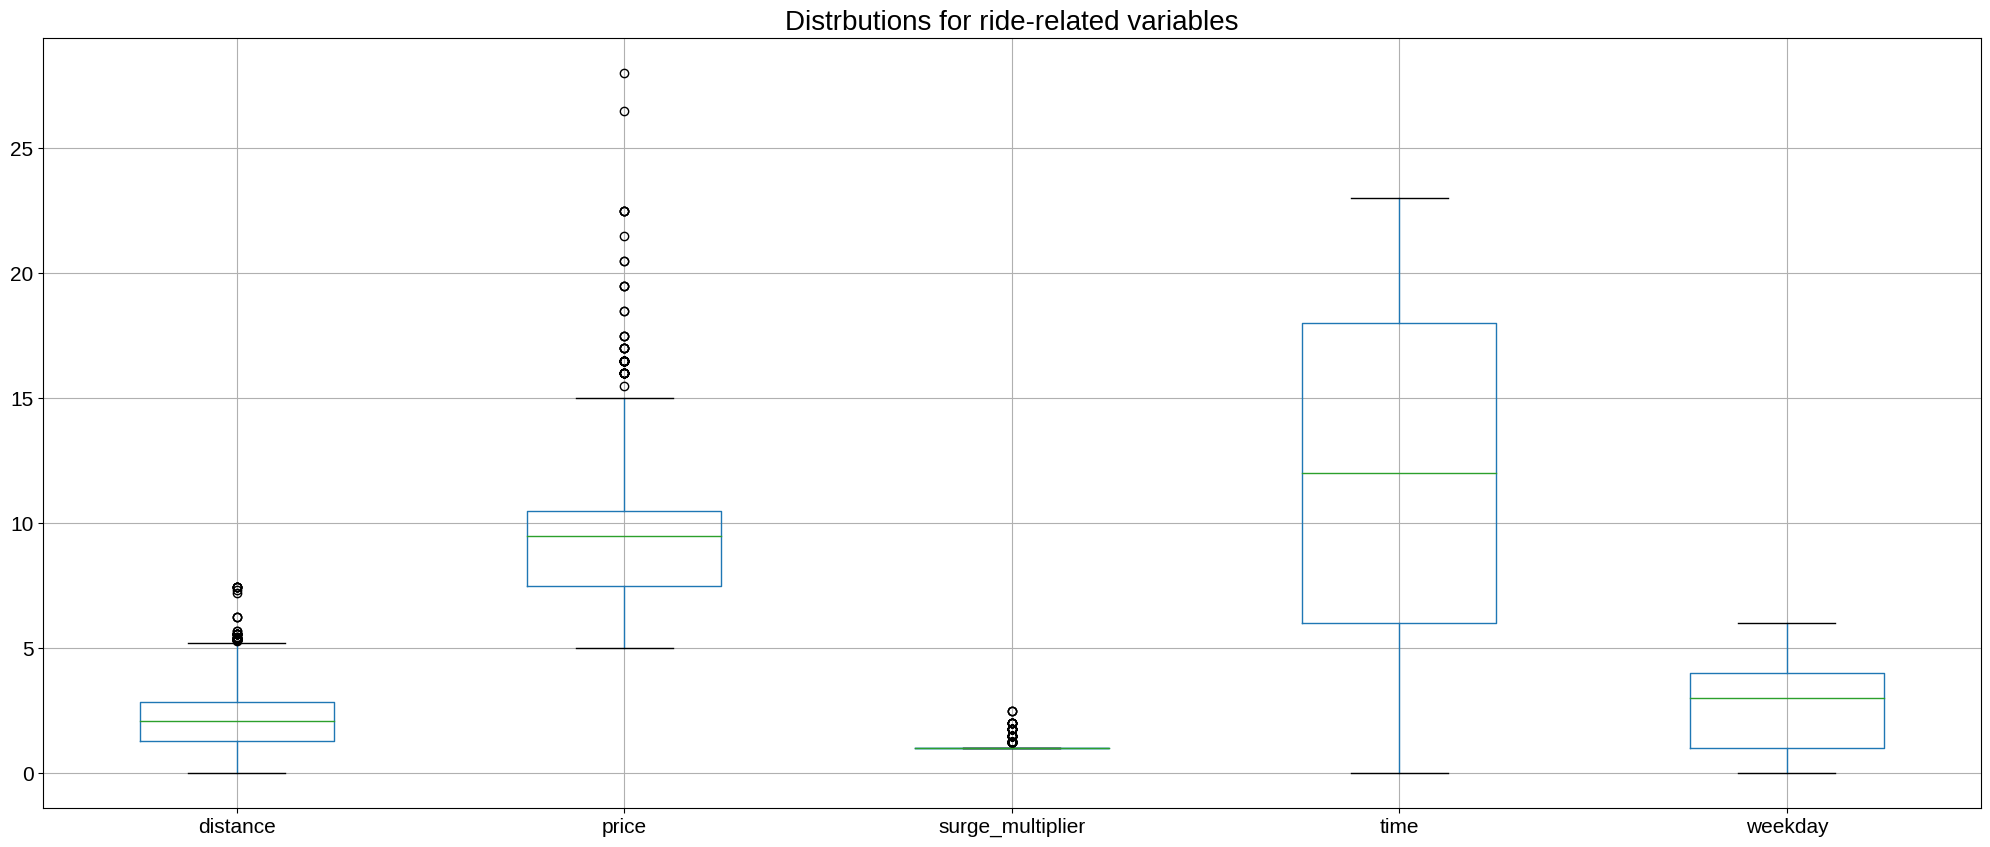

In [18]:

# Observing characteristics of the distribution of the numerical variables for the rides dataframe
print(rides[cols].describe())

# Creating a function to return the necessary information to remove the outliers    
def iqr(df):
    q1 = df.quantile(.25)
    q3 = df.quantile(.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr
    print(' ')
    print('The IQRs are:')
    print(iqr)
    print(' ')
    print('The upper limits for outliers are:')
    print(upper_limit)
    print(' ')
    print('The lower limits for outliers are:')
    print(lower_limit)
    print(' ')

# Calculating IQR, as well as upper and lower limits for outliers in case it becomes necessary to remove them
iqr(rides)

# Visualizing the distribution of the same variables
rides[cols].boxplot(figsize=((25,10)),fontsize=15)
plt.title('Distrbutions for ride-related variables',fontsize=20)
plt.style.use('seaborn')

plt.show()


Description of the variable "dollars per mile", a proxy for ride profitability:

count    2509.000000
mean        5.711502
std         7.928246
min         2.076677
25%         3.620690
50%         4.681648
75%         6.363636
max       375.000000
Name: dollars per mile, dtype: float64


<ipython-input-19-2fb67634bb1b>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


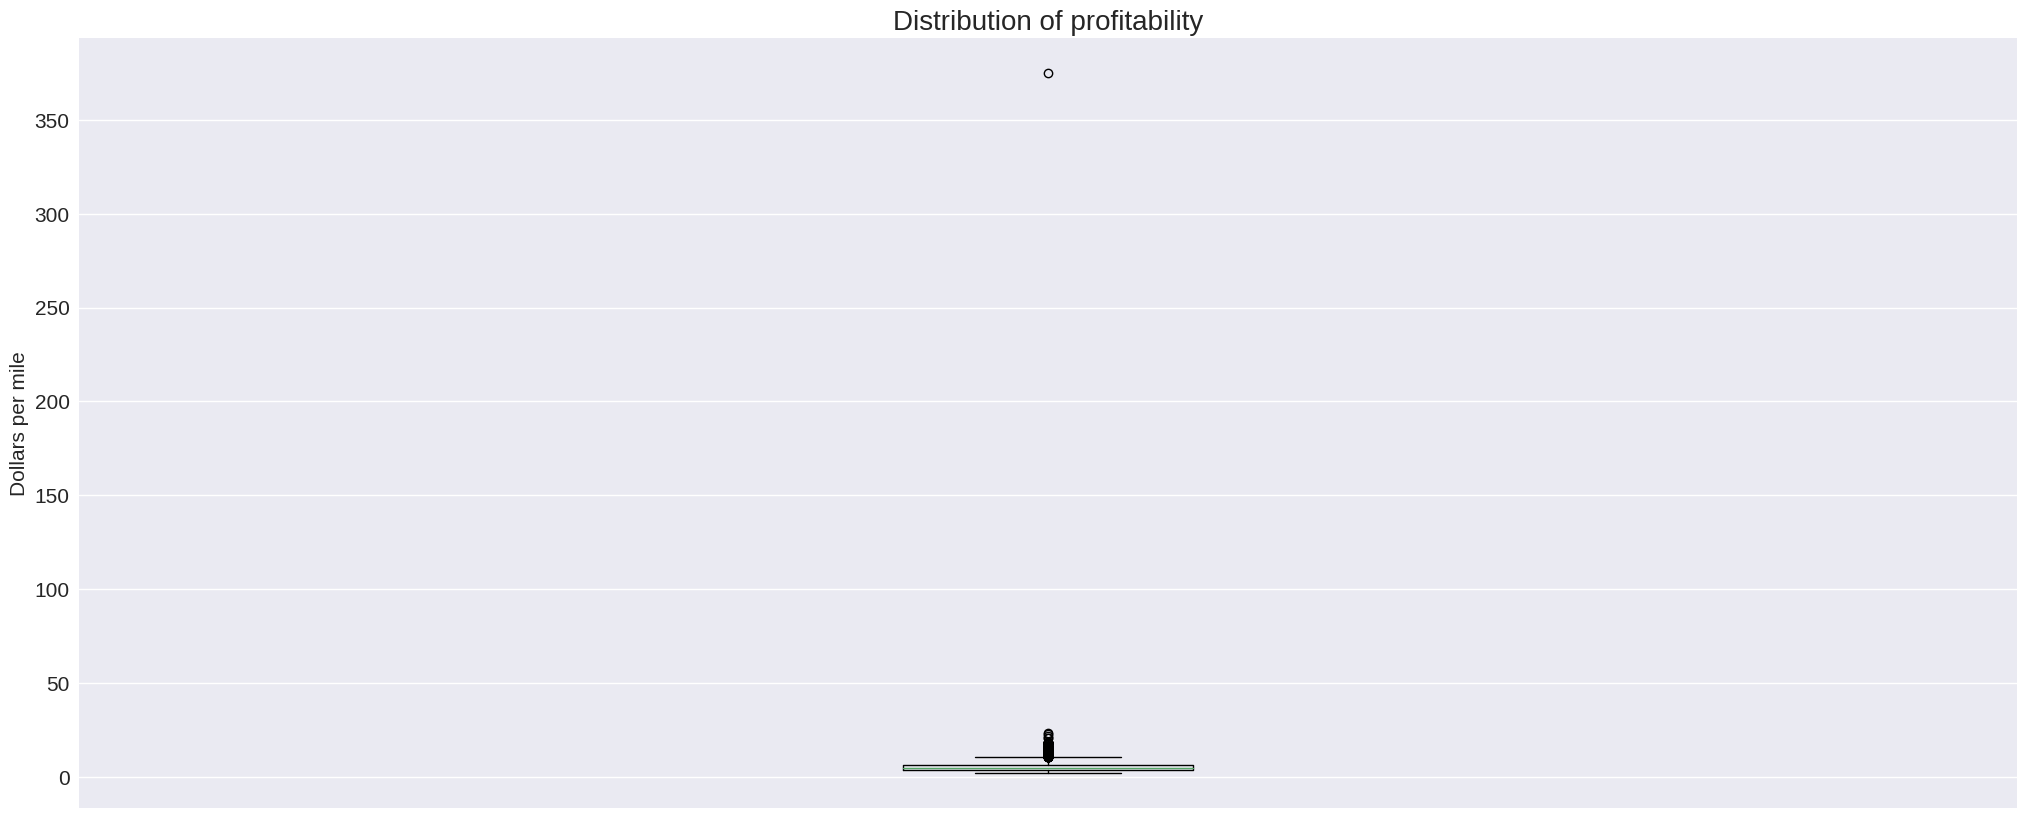

In [19]:
print('')
print('Description of the variable "dollars per mile", a proxy for ride profitability:')
print('')
print(rides['dollars per mile'].describe())

# Plotting the distribution of the proxy for profitability of each ride: dollars per mile
plt.figure(figsize=((25,10)))
plt.title('Distribution of profitability',fontsize=20)
plt.boxplot(rides['dollars per mile'])
plt.xticks([])
plt.yticks(fontsize=15)
plt.ylabel('Dollars per mile',fontsize=15)

plt.style.use('seaborn')
plt.show()

In [20]:
# creating one variable for the rides with profitability above 50$/mile
profit_outliers = rides[rides['dollars per mile']>50]

# Description of the distribution of the outtliers
print(profit_outliers.describe())

       distance  price  surge_multiplier  time  weekday  dollars per mile
count      1.00    1.0               1.0   1.0      1.0               1.0
mean       0.02    7.5               1.0  23.0      0.0             375.0
std         NaN    NaN               NaN   NaN      NaN               NaN
min        0.02    7.5               1.0  23.0      0.0             375.0
25%        0.02    7.5               1.0  23.0      0.0             375.0
50%        0.02    7.5               1.0  23.0      0.0             375.0
75%        0.02    7.5               1.0  23.0      0.0             375.0
max        0.02    7.5               1.0  23.0      0.0             375.0


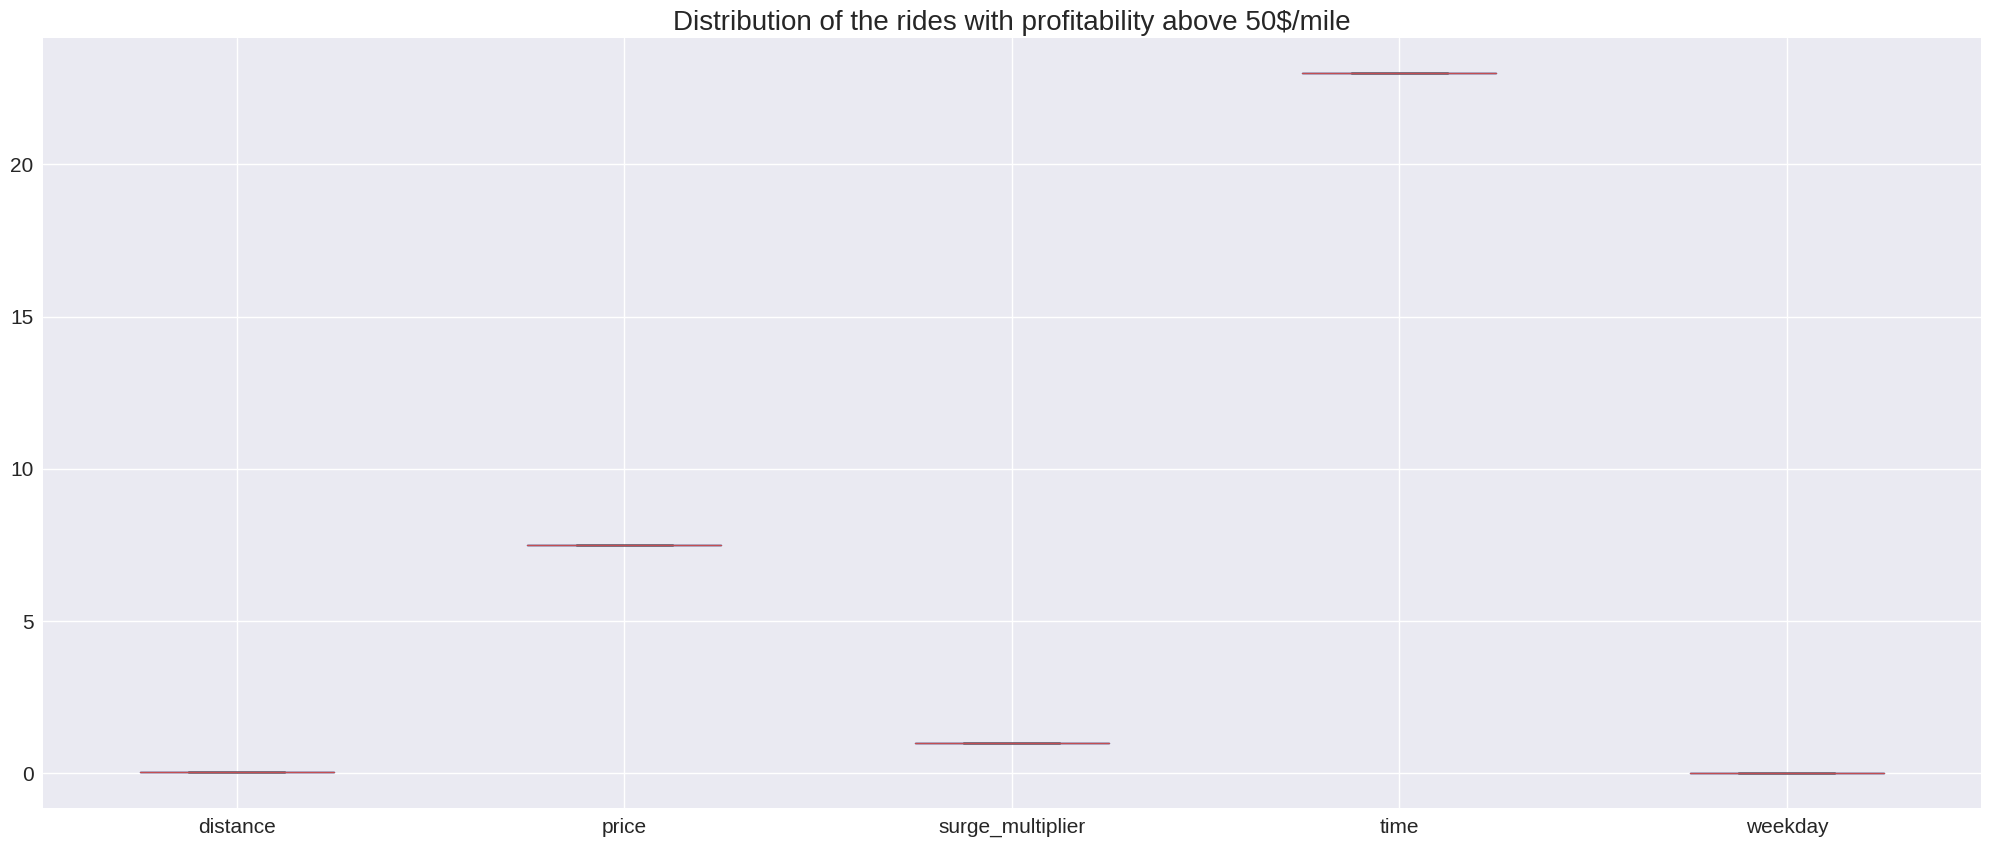

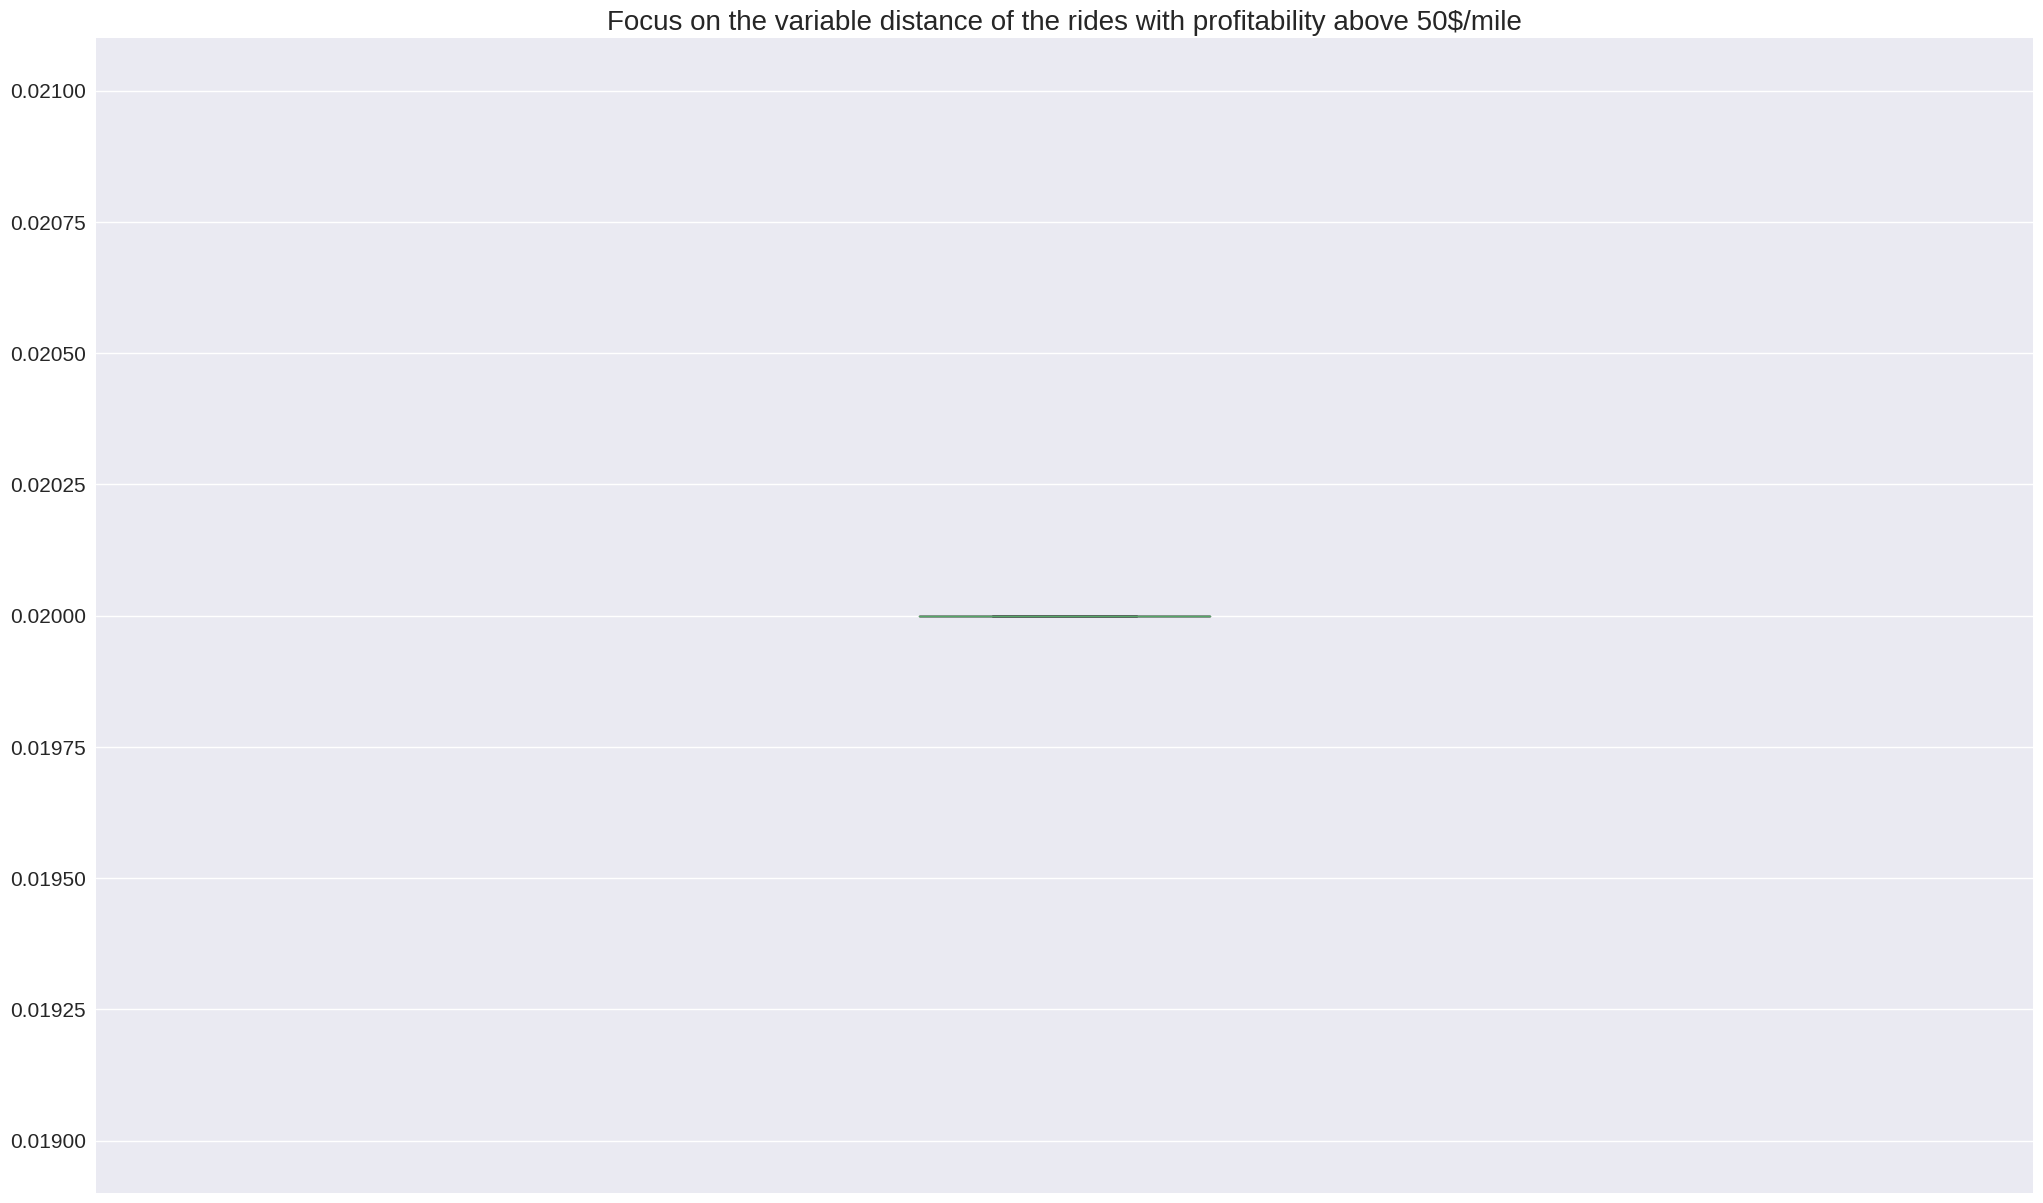

In [22]:
# Plotting the distribution of the outliers of 'dollars per mile'
profit_outliers[cols].boxplot(figsize=((25,10)))
plt.title('Distribution of the rides with profitability above 50$/mile',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.figure(figsize=((25,15)))
plt.boxplot(profit_outliers['distance'])
plt.xticks([],fontsize=15)
plt.yticks(fontsize=15)
plt.title('Focus on the variable distance of the rides with profitability above 50$/mile',fontsize=20)

plt.show()

In [24]:
source_count = rides.groupby('source')['id'].count()
print('')
print('List of number of rides per source location:')
print('')
print(source_count)


List of number of rides per source location:

source
Back Bay                   200
Beacon Hill                210
Boston University          185
Fenway                     216
Financial District         216
Haymarket Square           206
North End                  213
North Station              223
Northeastern University    200
South Station              191
Theatre District           228
West End                   221
Name: id, dtype: int64


In [26]:
destination_count = rides.groupby('destination')['id'].count()
print('')
print('List of number of rides per destination:')
print('')
print(destination_count)


List of number of rides per destination:

destination
Back Bay                   195
Beacon Hill                220
Boston University          205
Fenway                     215
Financial District         178
Haymarket Square           223
North End                  233
North Station              210
Northeastern University    220
South Station              202
Theatre District           210
West End                   198
Name: id, dtype: int64


<ipython-input-27-e9882b951a46>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


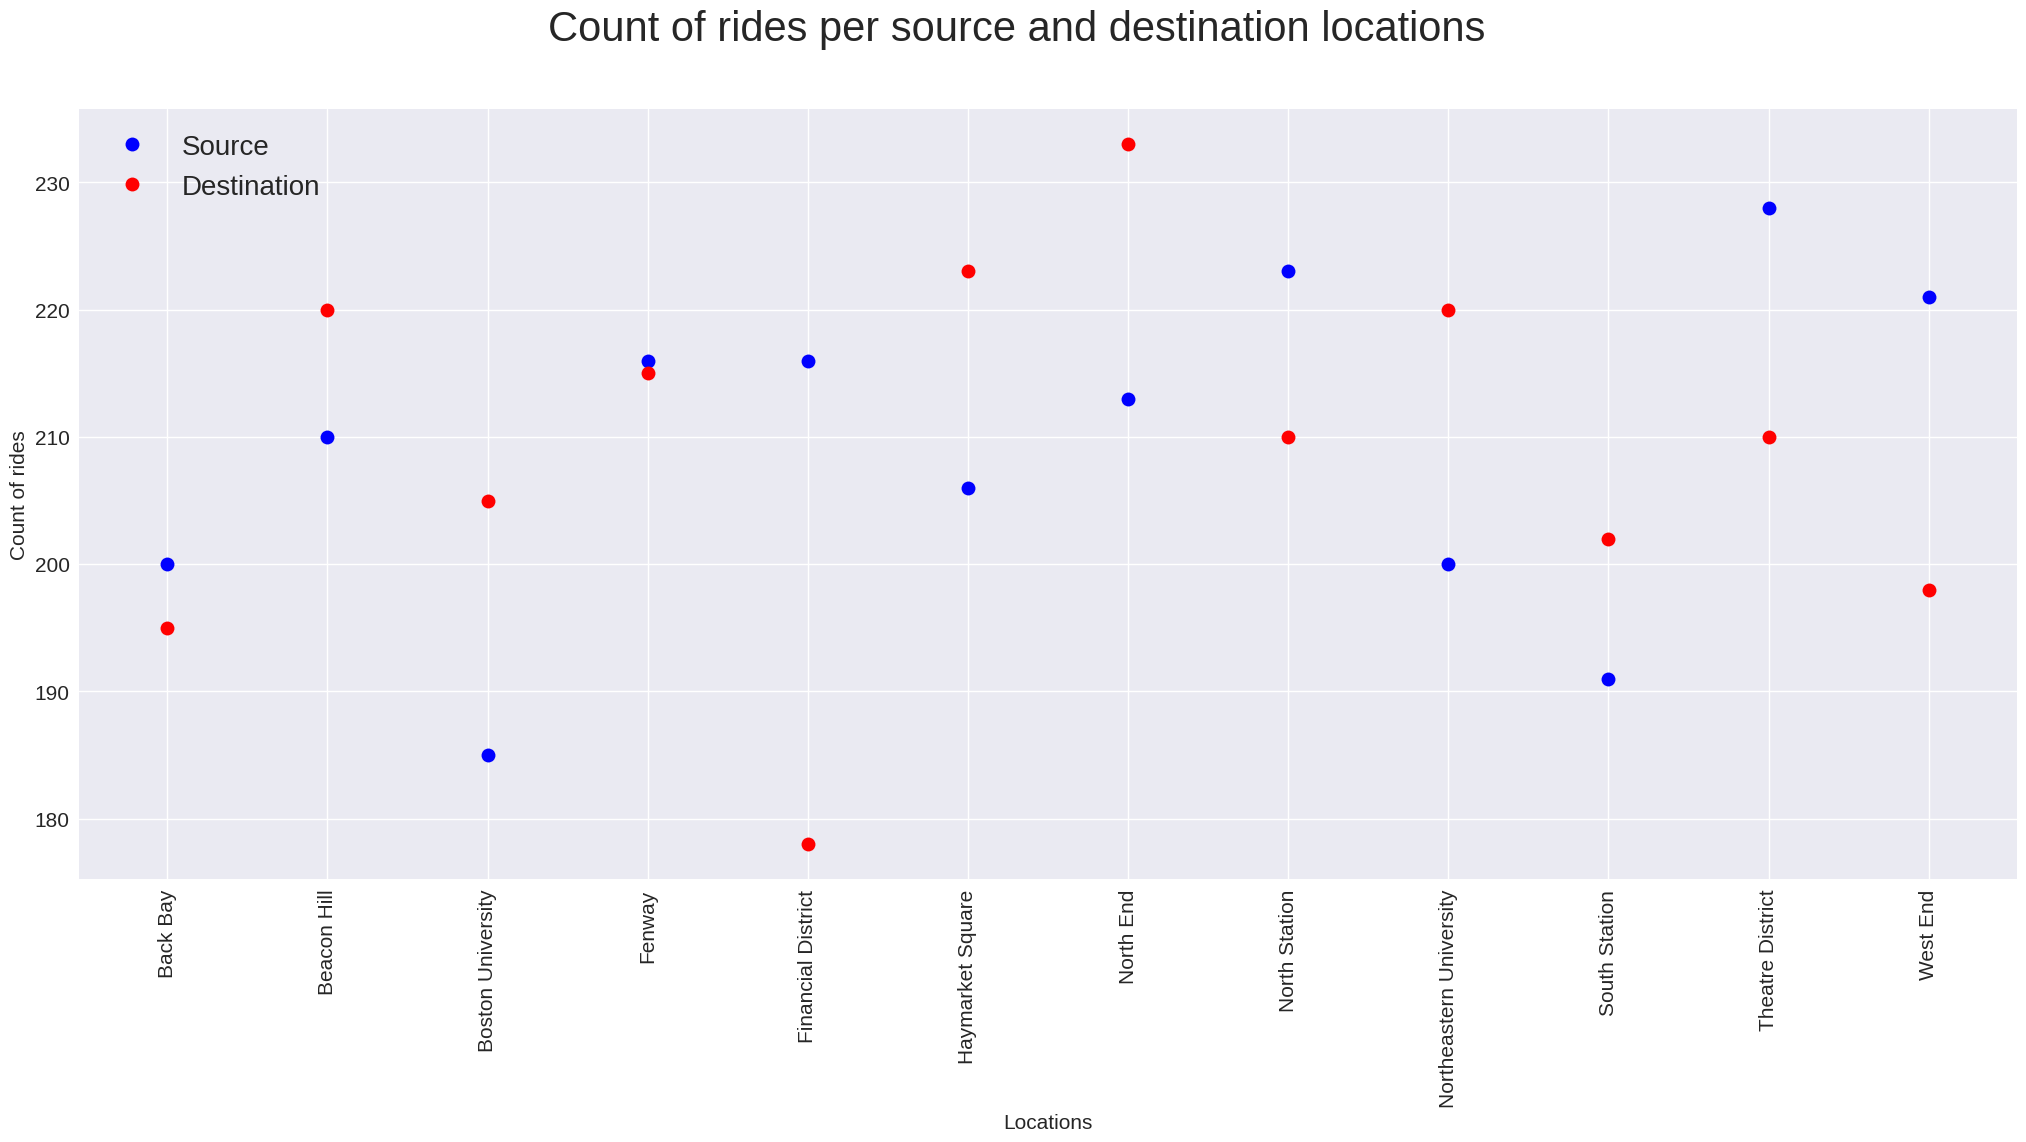

In [27]:
fig,ax = plt.subplots(figsize=((25,10)))
plt.plot(source_count,'blue',label='Source',marker='.',linestyle='none',markersize=20)
plt.plot(destination_count,'red',label='Destination',marker='.',linestyle='none',markersize=20)

fig.suptitle('Count of rides per source and destination locations',fontsize=30)
plt.ylabel('Count of rides',fontsize=15)
plt.xlabel('Locations',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.legend(fancybox=True,fontsize=20)
plt.style.use('seaborn')

plt.show()

In [28]:
source_sum = rides.groupby('source')['price'].sum()
print('')
print('List of aggregated revenue per source location:')
print('')
print(source_sum)


List of aggregated revenue per source location:

source
Back Bay                   1860.0
Beacon Hill                1932.5
Boston University          2033.5
Fenway                     2241.0
Financial District         2209.0
Haymarket Square           1649.0
North End                  1916.0
North Station              2089.5
Northeastern University    2105.0
South Station              1786.0
Theatre District           2222.5
West End                   2056.0
Name: price, dtype: float64


In [29]:
destination_sum = rides.groupby('destination')['price'].sum()
print('')
print('List of aggregated revenue per destination:')
print('')
print(destination_sum)


List of aggregated revenue per destination:

destination
Back Bay                   1915.0
Beacon Hill                2108.5
Boston University          2255.5
Fenway                     2244.5
Financial District         1867.5
Haymarket Square           1851.5
North End                  2012.5
North Station              2015.0
Northeastern University    2308.0
South Station              1697.5
Theatre District           1968.5
West End                   1856.0
Name: price, dtype: float64


<ipython-input-30-d7225b6e16a2>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


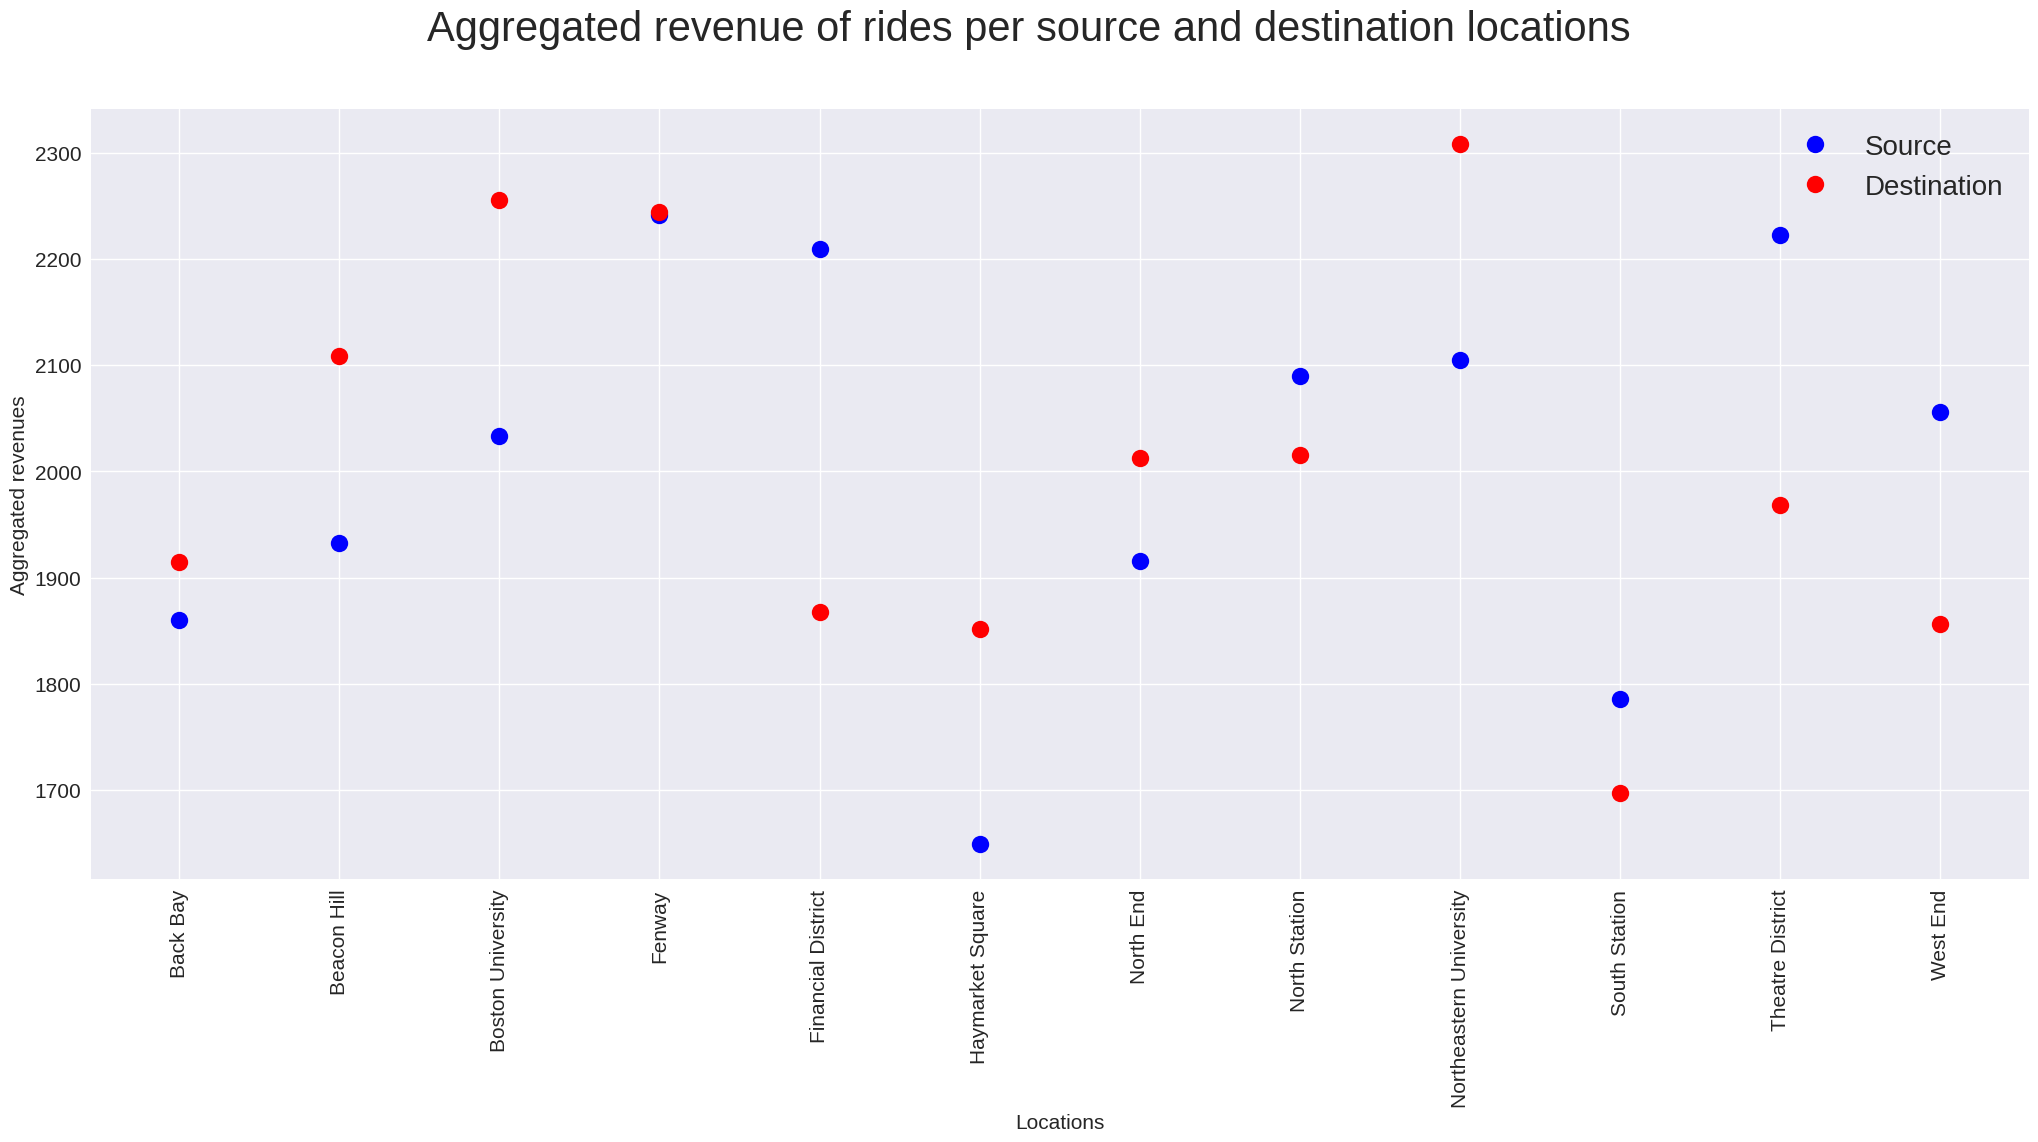

In [30]:
fig,ax = plt.subplots(figsize=((25,10)))
plt.plot(source_sum,'blue',label='Source',marker='.',linestyle='none',markersize=25)
plt.plot(destination_sum,'red',label='Destination',marker='.',linestyle='none',markersize=25)

fig.suptitle('Aggregated revenue of rides per source and destination locations',fontsize=30)
plt.ylabel('Aggregated revenues',fontsize=15)
plt.xlabel('Locations',fontsize=15)
plt.legend(fancybox=True,fontsize=20)
plt.style.use('seaborn')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=90)

plt.show()

<ipython-input-31-73cd74cefb4d>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


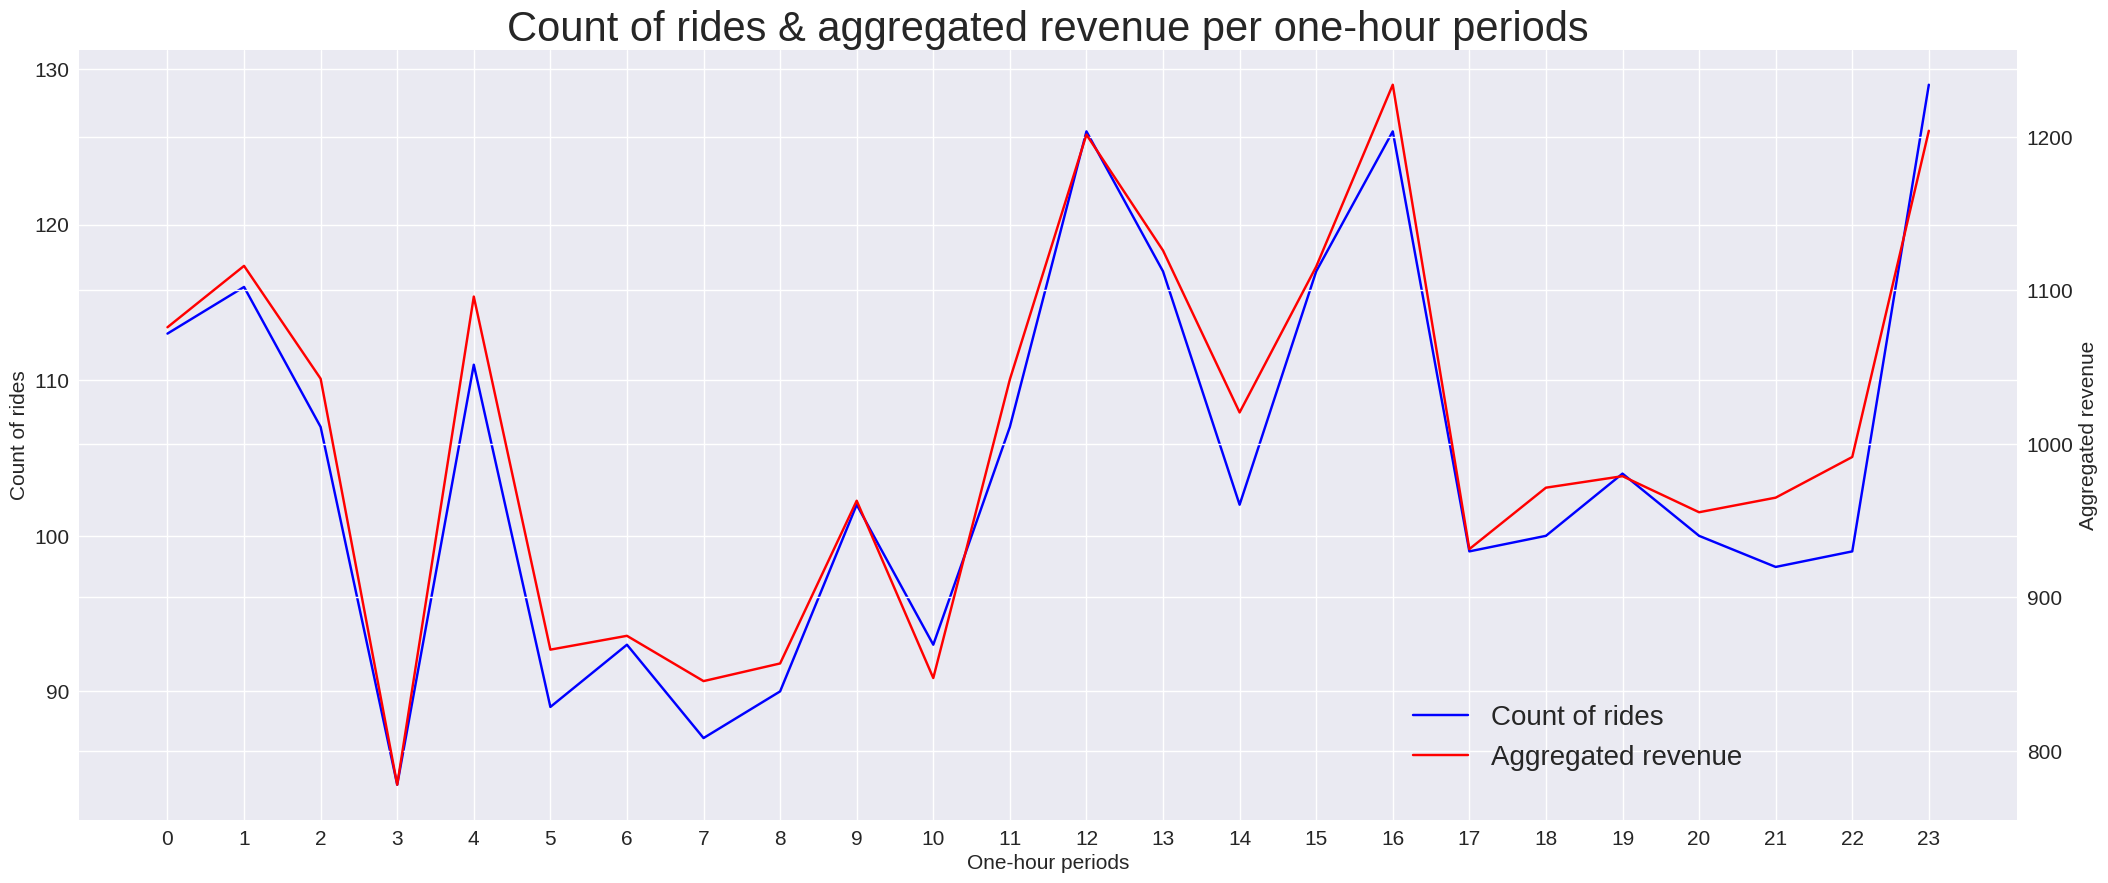

In [31]:
time_count = rides.groupby('time')['id'].count()
time_sum = rides.groupby('time')['price'].sum()
fig,ax1 = plt.subplots(figsize=((25,10)))
plt.plot(time_count,'blue',label='Count of rides')
plt.title('Count of rides & aggregated revenue per one-hour periods',fontsize=30)
plt.ylabel('Count of rides',fontsize=15)
plt.xlabel('One-hour periods',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(np.arange(0,24,1),fontsize=15)

ax2 = ax1.twinx()
plt.plot(time_sum,'red',label='Aggregated revenue')
plt.ylabel('Aggregated revenue',fontsize=15)
plt.style.use('seaborn')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

fig.legend(bbox_to_anchor=(0.8,0.25),fancybox=True,fontsize=20)
plt.show()

In [33]:
weekday_count = rides.groupby('weekday')['id'].count()
print('')
print('List of number of rides per weekday:')
print('')
print(weekday_count)


List of number of rides per weekday:

weekday
0    450
1    434
2    296
3    396
4    333
5    293
6    307
Name: id, dtype: int64


In [34]:
weekday_sum = rides.groupby('weekday')['price'].sum()
print('')
print('List of aggregated revenue per weekday:')
print('')
print(weekday_sum)


List of aggregated revenue per weekday:

weekday
0    4445.5
1    4142.5
2    2826.0
3    3791.0
4    3196.0
5    2720.5
6    2978.5
Name: price, dtype: float64


<ipython-input-35-dd2ea2335495>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


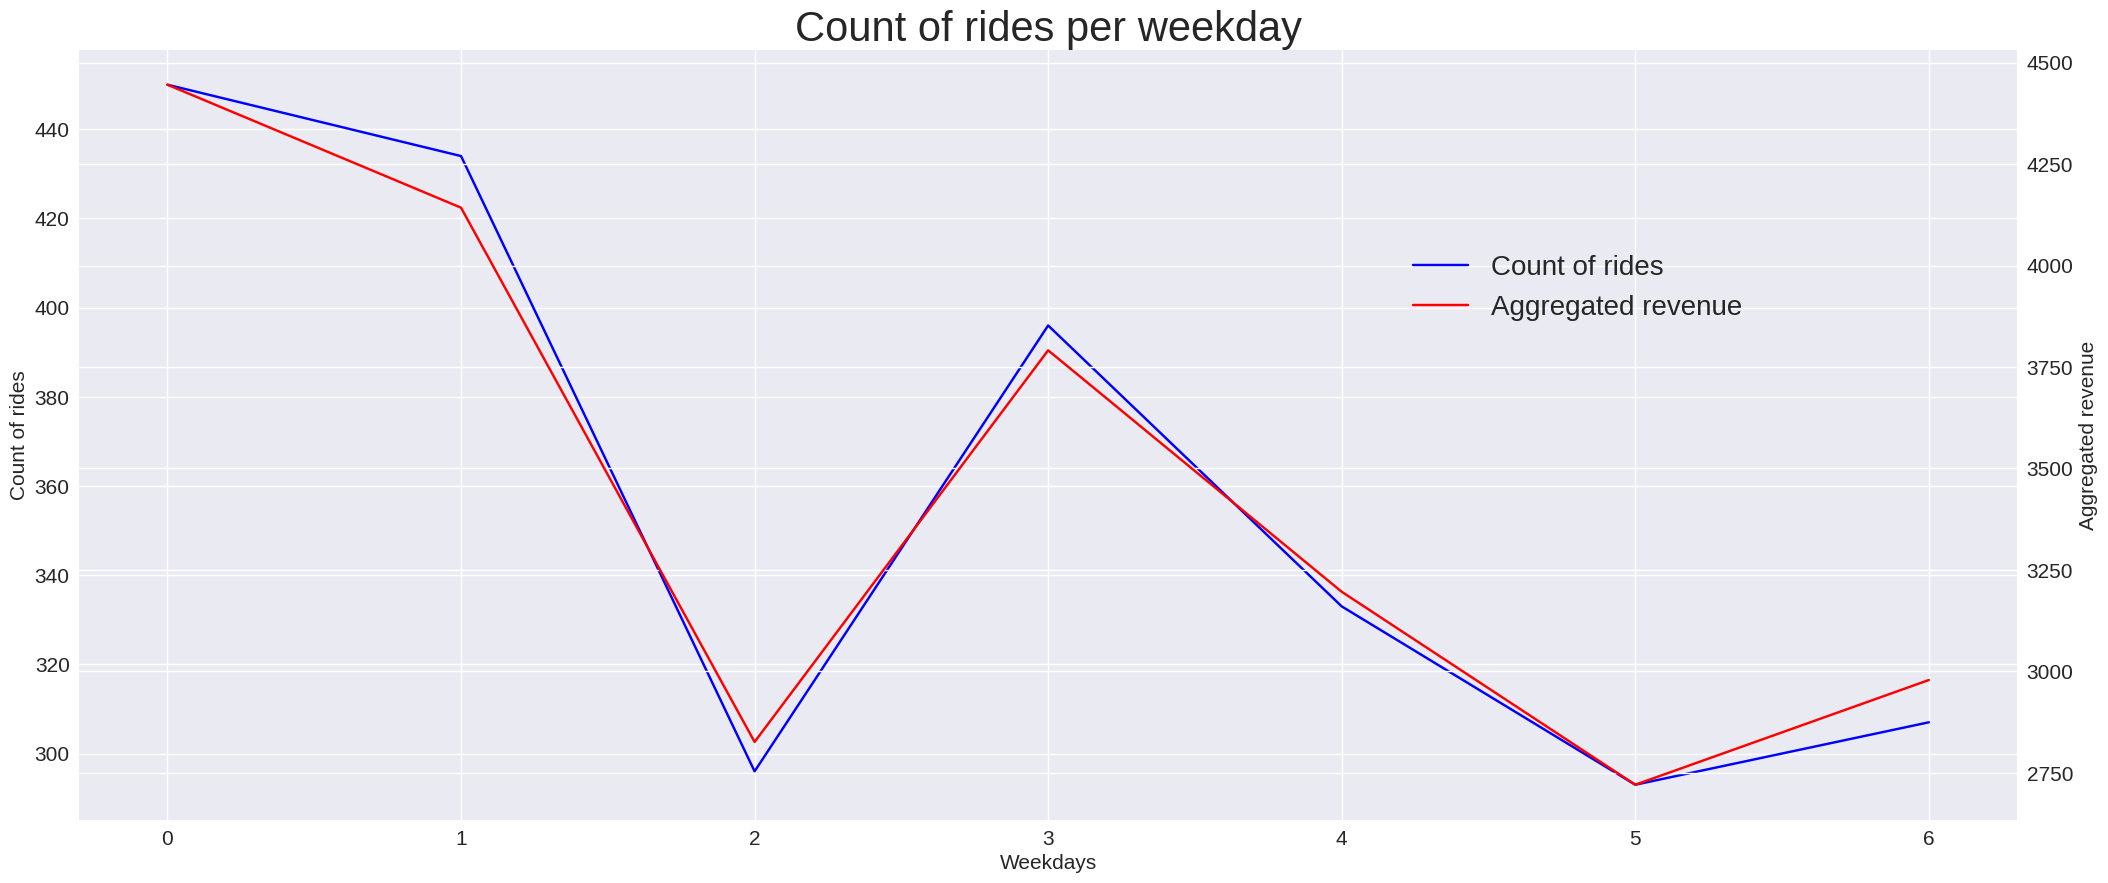

In [35]:
fig,ax1 = plt.subplots(figsize=((25,10)))
plt.plot(weekday_count,'blue',label='Count of rides')
plt.title('Count of rides per weekday',fontsize=30)
plt.ylabel('Count of rides',fontsize=15)
plt.xlabel('Weekdays',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

ax2 = ax1.twinx()
plt.plot(weekday_sum,'red',label='Aggregated revenue')
plt.ylabel('Aggregated revenue',fontsize=15)
plt.style.use('seaborn')
plt.yticks(fontsize=15)

fig.legend(bbox_to_anchor=(0.8,0.7),fancybox=True,fontsize=20)
plt.show()

<ipython-input-36-c835e5ae6eb2>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


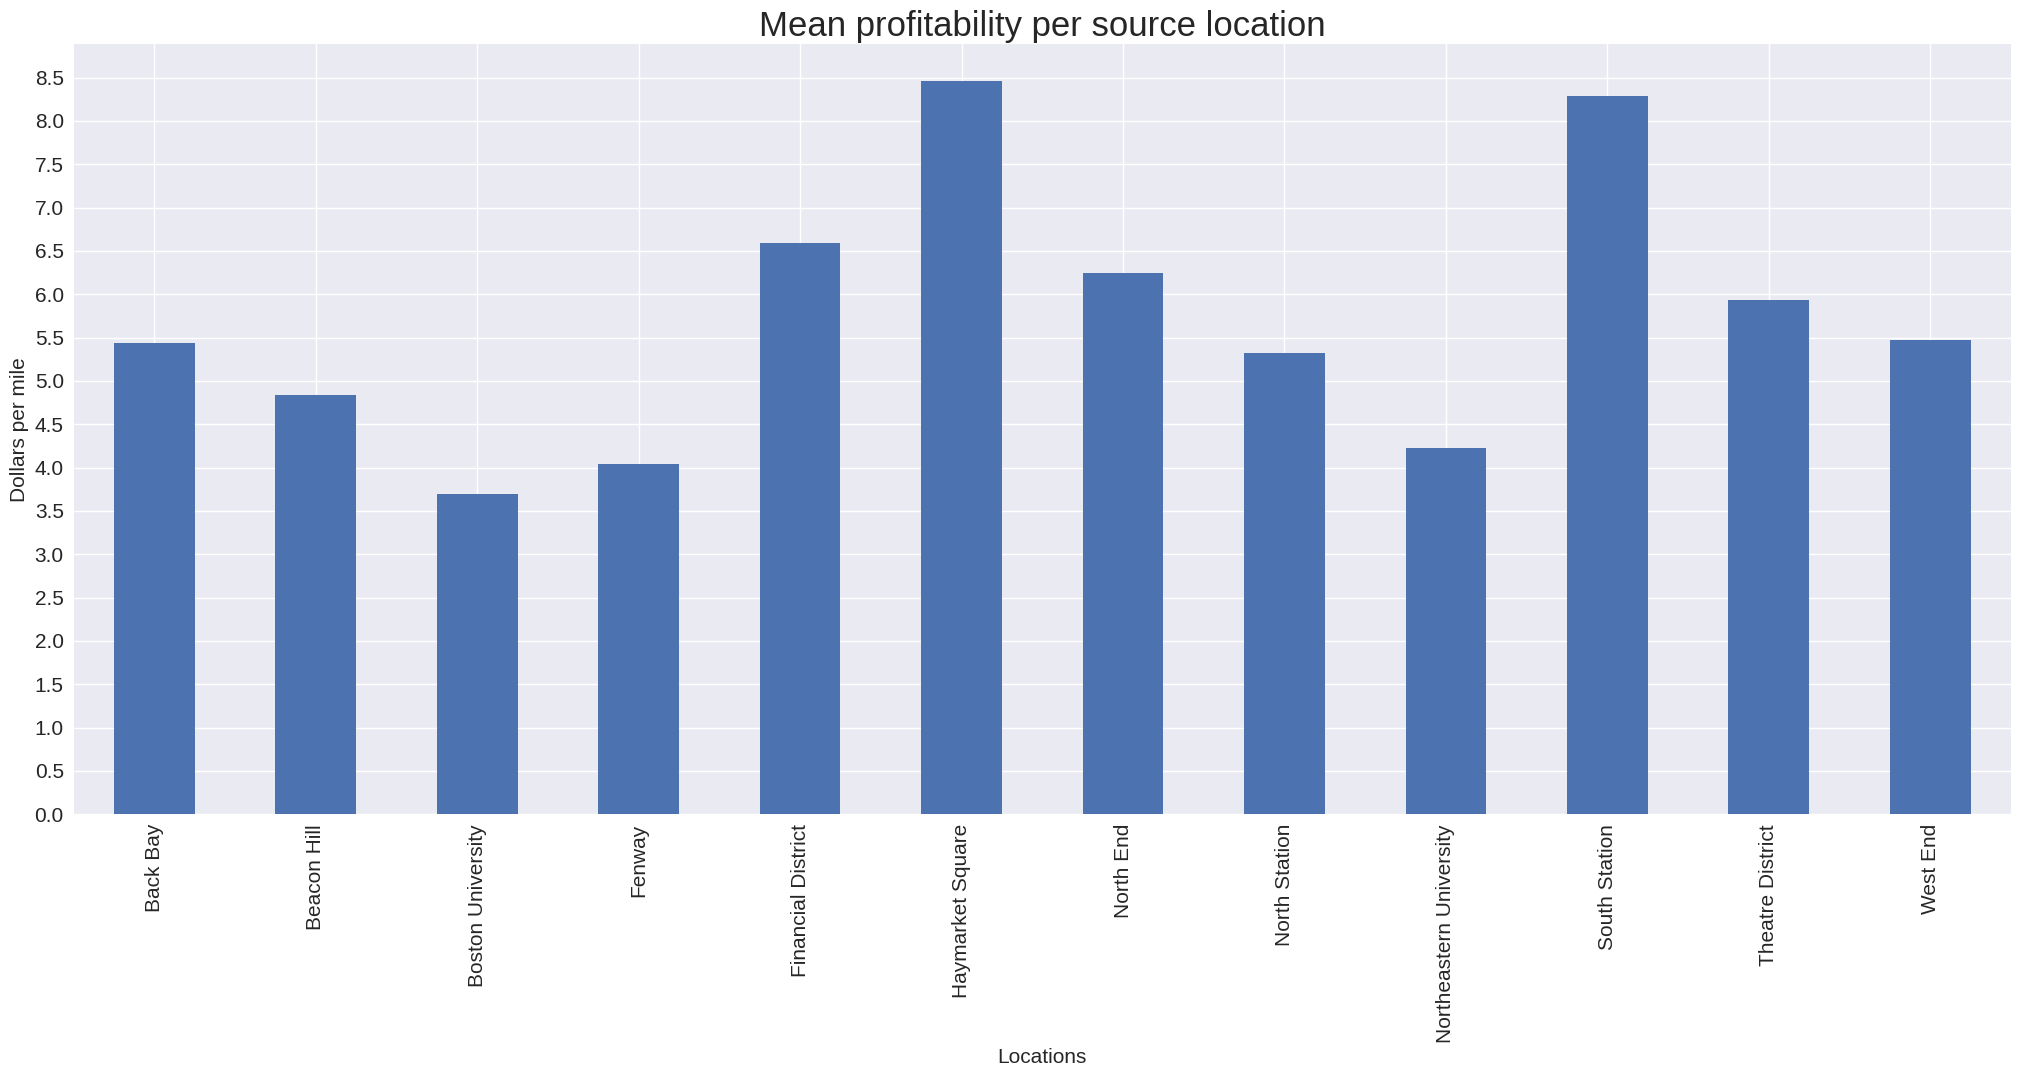

In [36]:
# Grouping profitability by source location of the ride
source_profitability = rides.groupby('source')['dollars per mile'].mean()

#Plotting profitability per source location
plt.figure(figsize=((25,10)))
source_profitability.plot.bar()
plt.title('Mean profitability per source location',fontsize=25)
plt.ylabel('Dollars per mile',fontsize=15)
plt.xlabel('Locations',fontsize=15)
plt.style.use('seaborn')
plt.yticks(np.arange(0,9,0.5),fontsize=15)
plt.xticks(fontsize=15,rotation=90)

plt.show()

<ipython-input-37-208647706fa6>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


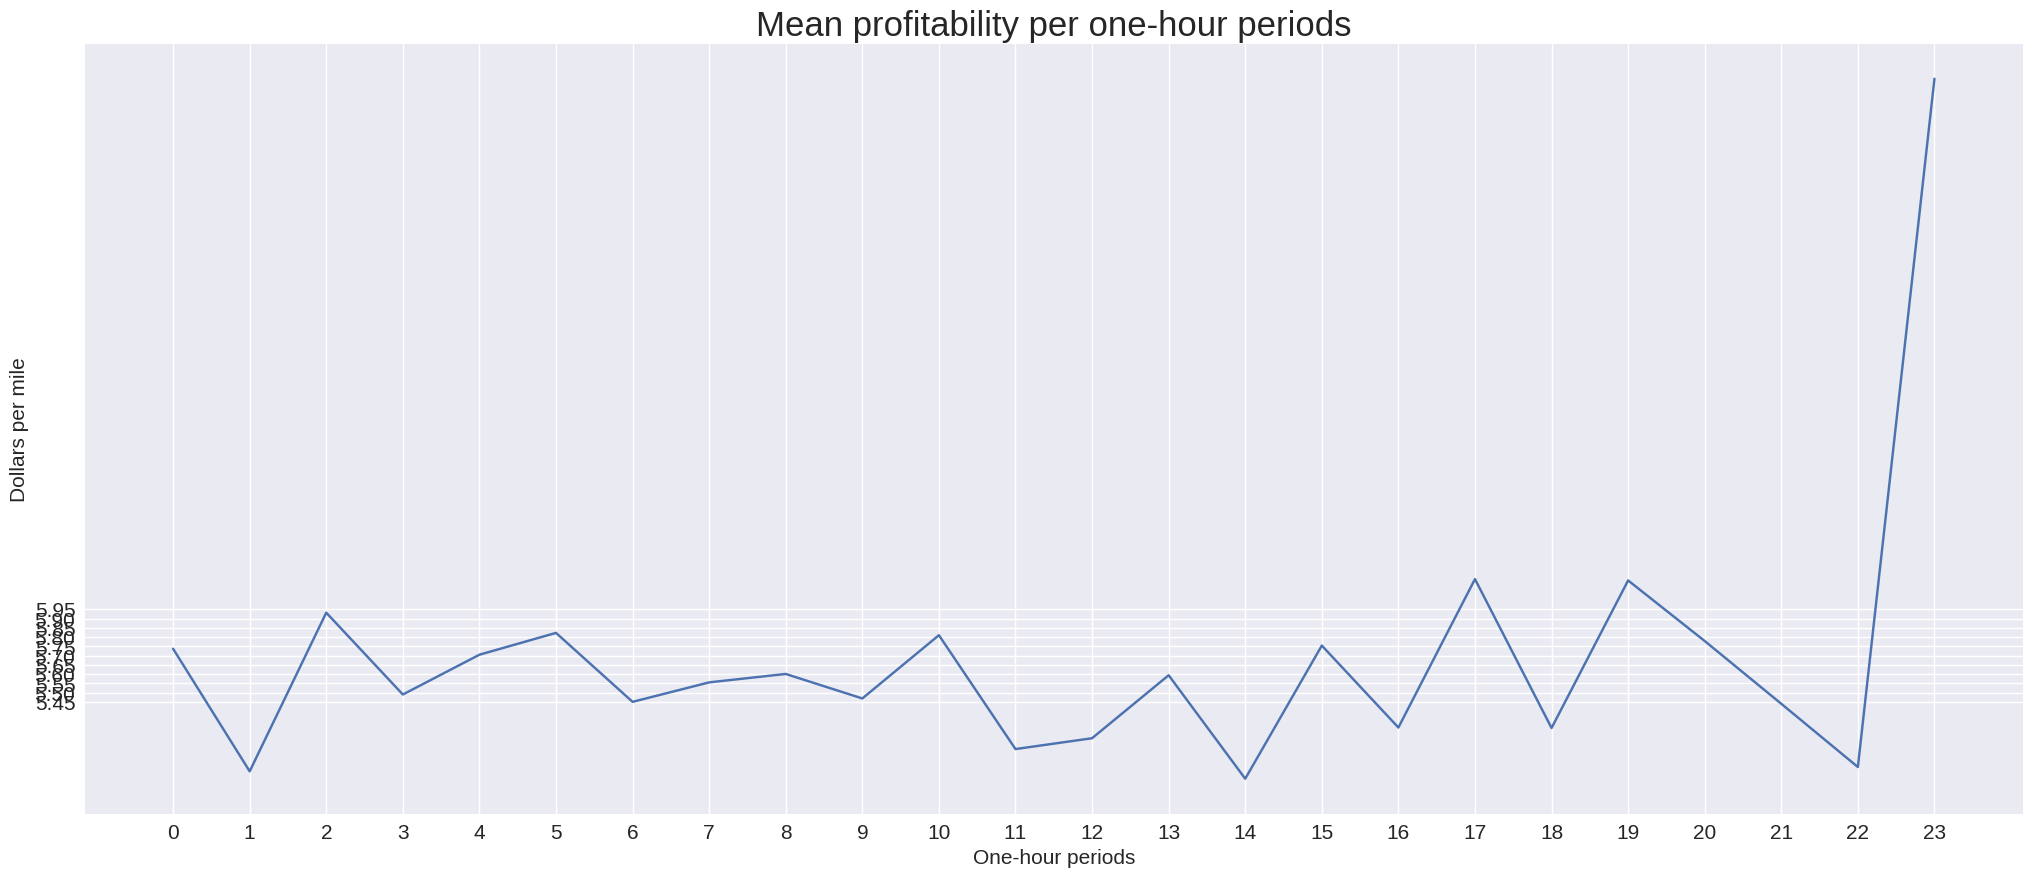

In [37]:
# Grouping profitability by time of the day 
hour_profitability = rides.groupby('time')['dollars per mile'].mean()

# Plotting profitability by time of the day
plt.figure(figsize=((25,10)))
hour_profitability.plot()
plt.title('Mean profitability per one-hour periods',fontsize=25)
plt.ylabel('Dollars per mile',fontsize=15)
plt.xlabel('One-hour periods',fontsize=15)
plt.style.use('seaborn')
plt.yticks(np.arange(5.45,6,0.05),fontsize=15)
plt.xticks(np.arange(0,24,1),fontsize=15)

plt.show()

<ipython-input-38-7b9c9c0f800f>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


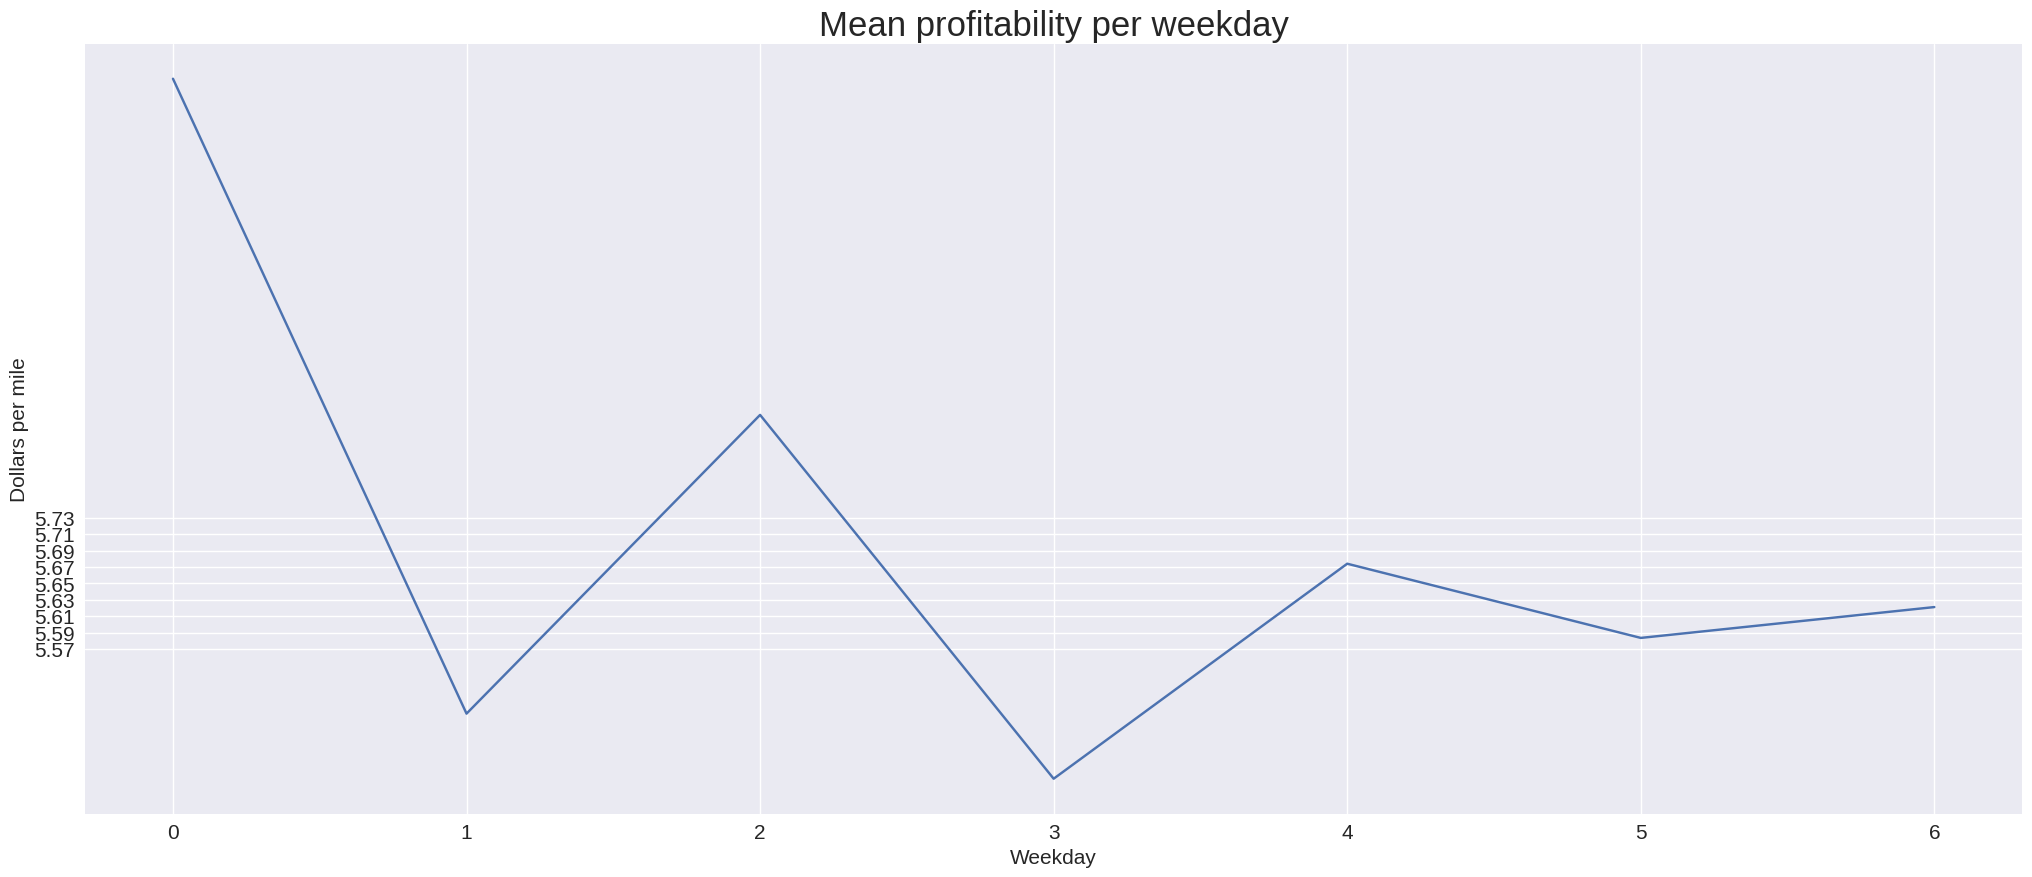

In [38]:
# Grouping profitability by weekday
weekday_profitability = rides.groupby('weekday')['dollars per mile'].mean()

# Plotting profitability by weekday
plt.figure(figsize=((25,10)))
weekday_profitability.plot()
plt.title('Mean profitability per weekday',fontsize=25)
plt.ylabel('Dollars per mile',fontsize=15)
plt.xlabel('Weekday',fontsize=15)
plt.style.use('seaborn')
plt.yticks(np.arange(5.57,5.75,0.02),fontsize=15)
plt.xticks(fontsize=15)

plt.show()

<ipython-input-40-786acff7b9e2>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


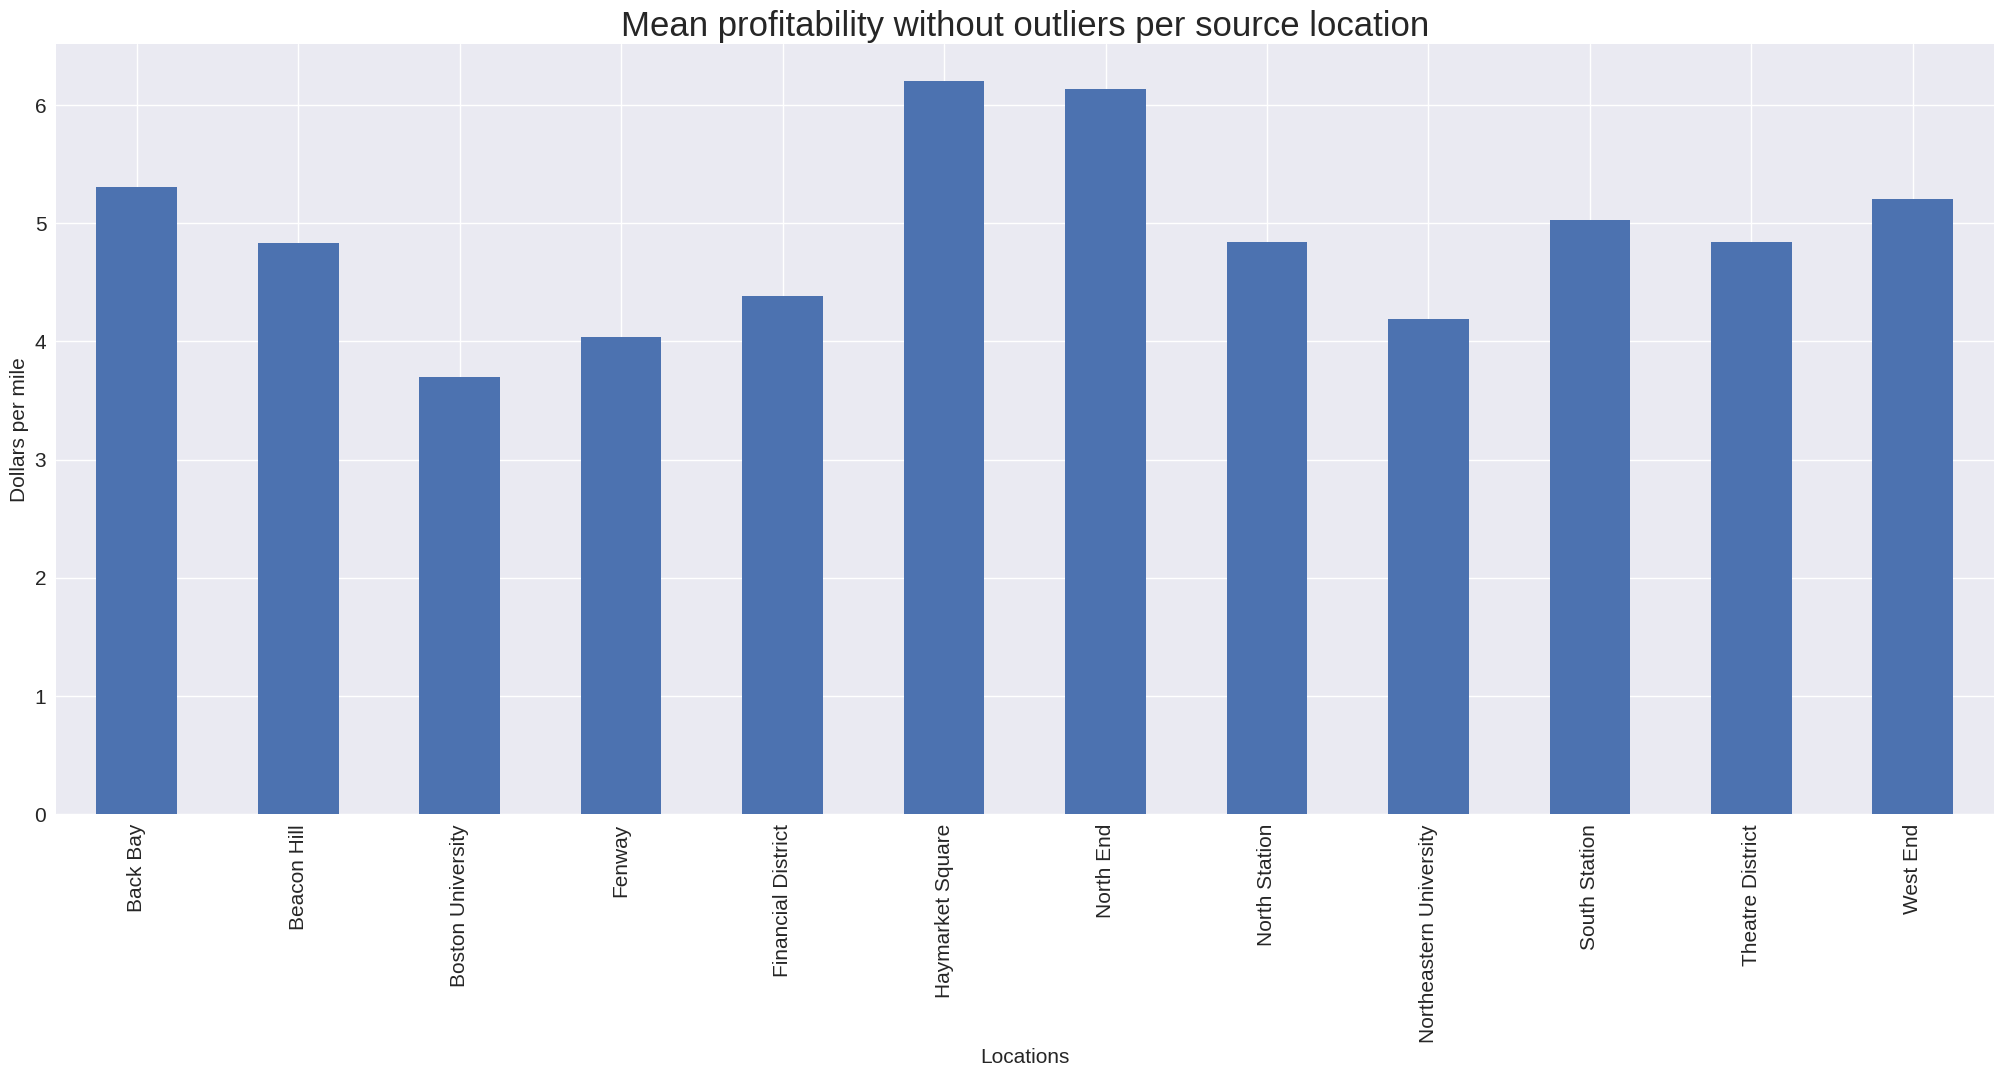

In [40]:
# Creating the new variable
rides_profit = rides[(rides['dollars per mile']>=-0.454)&(rides['dollars per mile']<=10.406)]

# Grouping profitability without outliers by source location of each ride
source_profitability_no_out = rides_profit.groupby('source')['dollars per mile'].mean()

# Plotting profitability without outliers per source
plt.figure(figsize=((25,10)))
source_profitability_no_out.plot.bar()
plt.title('Mean profitability without outliers per source location',fontsize=25)
plt.ylabel('Dollars per mile',fontsize=15)
plt.xlabel('Locations',fontsize=15)
plt.style.use('seaborn')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=90)

plt.show()

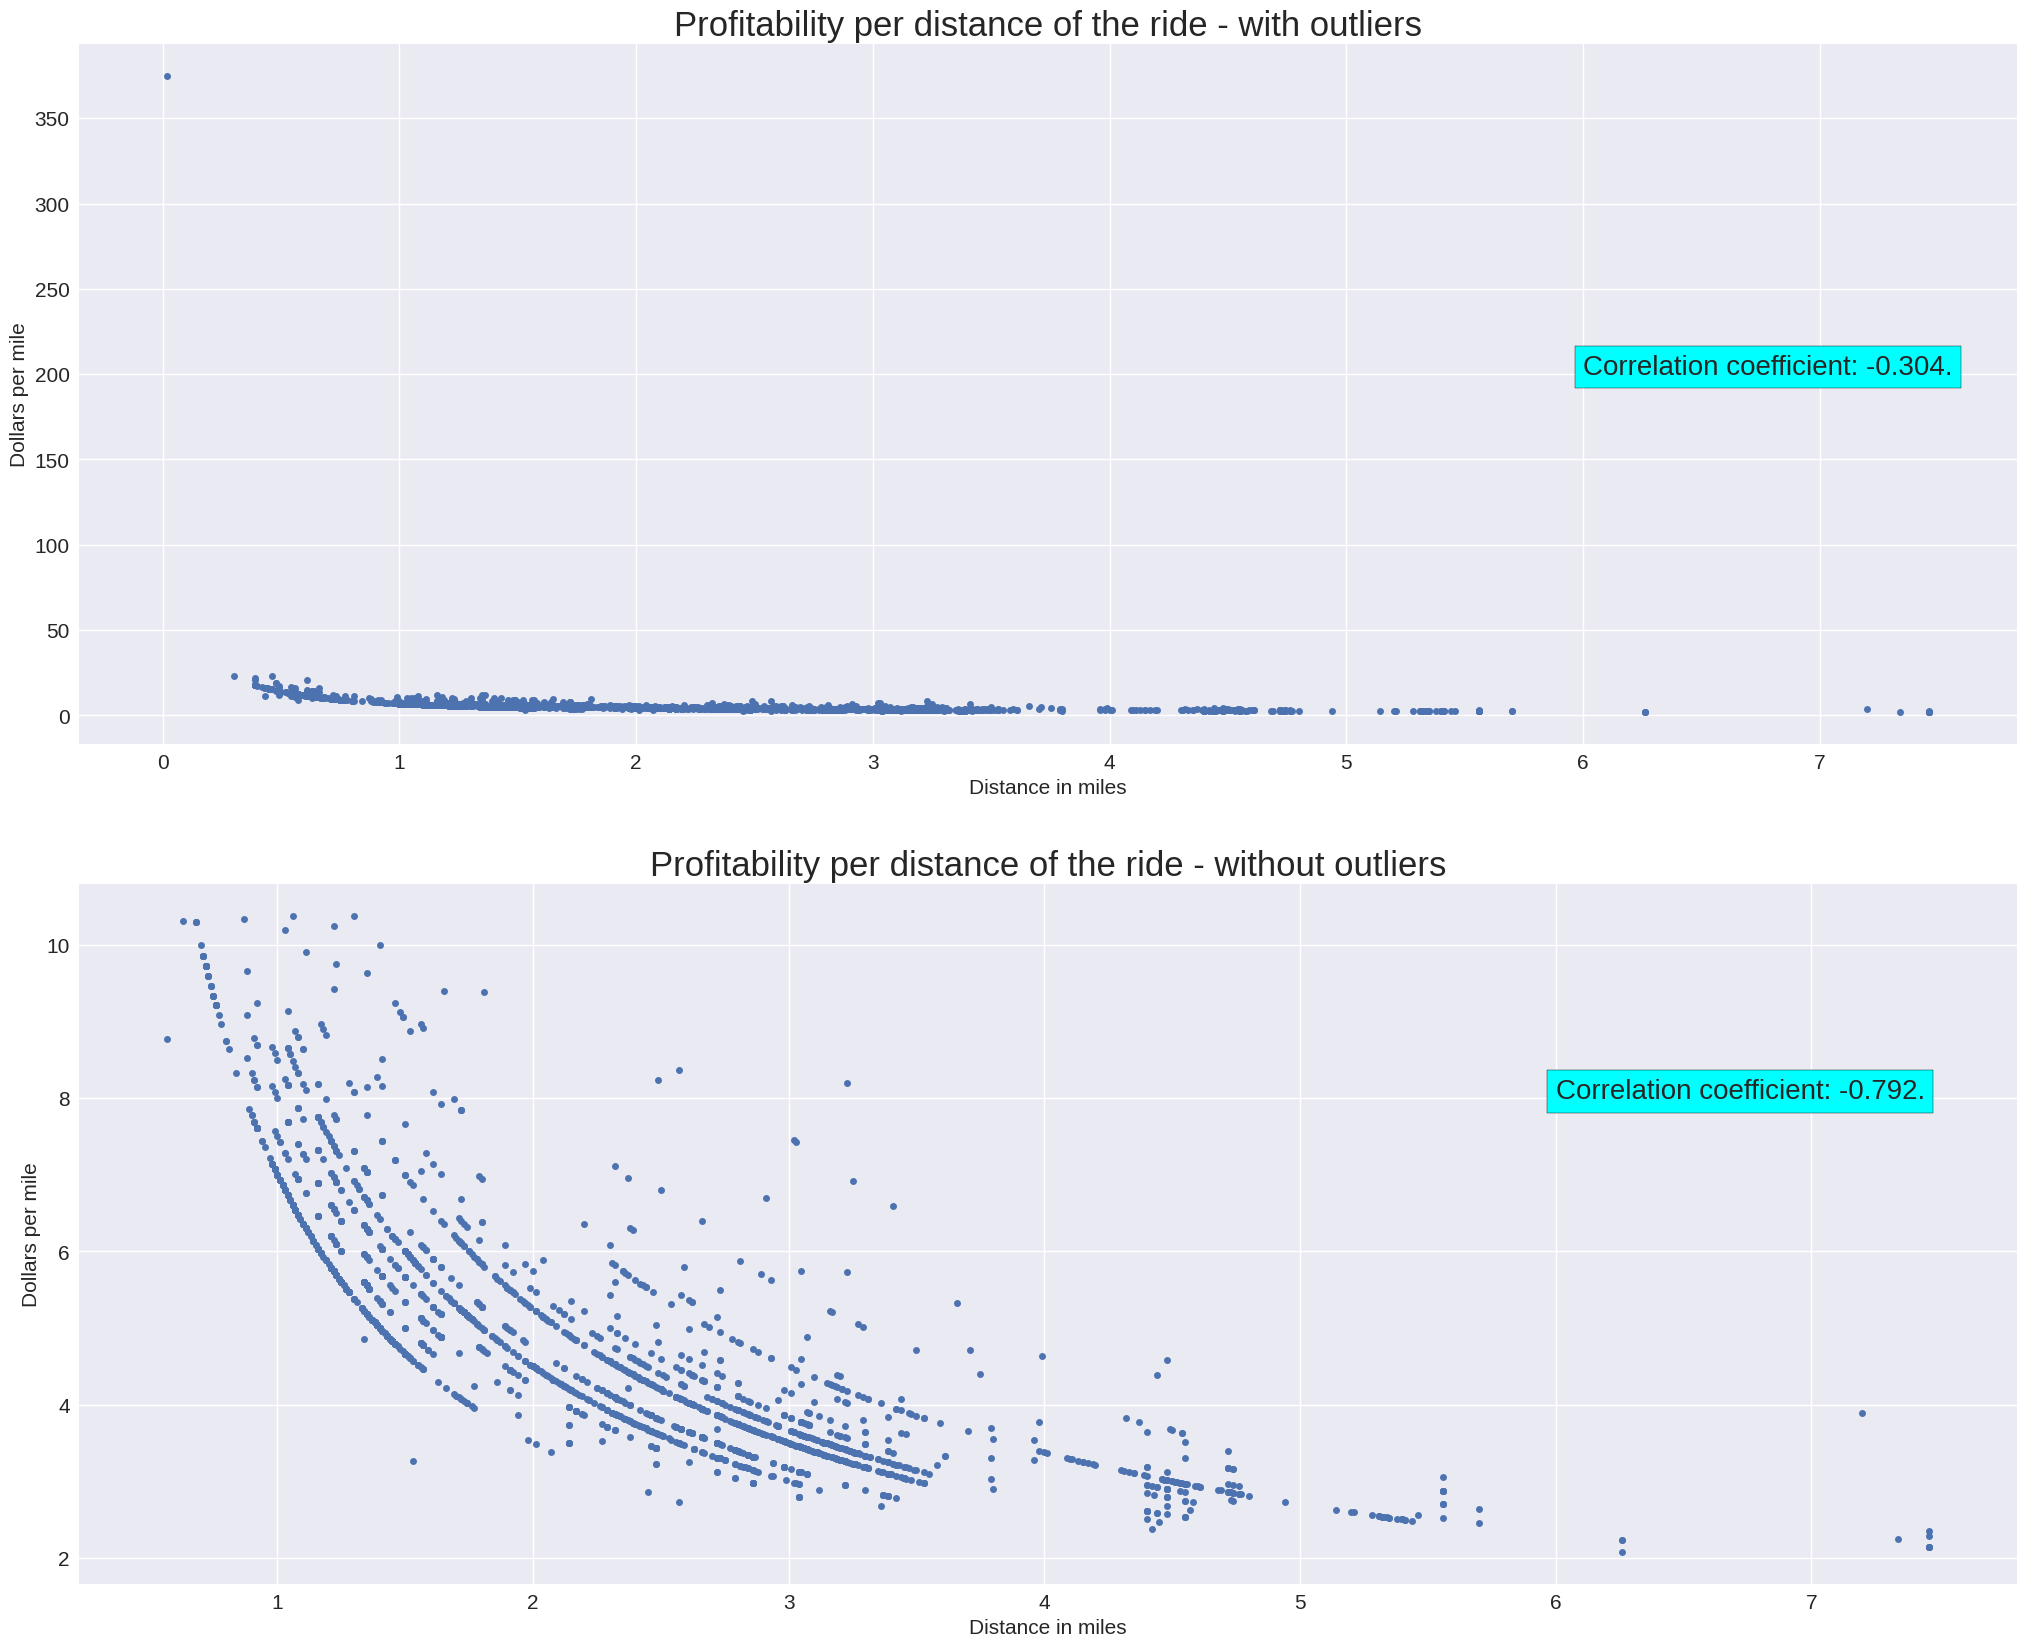

In [41]:
# Calculation correlation between profitability with the outliers and distance of the rides
corr_a = rides['distance'].corr(rides['dollars per mile']).round(3)

# Calculation correlation between profitability without the outliers and distance of the rides
corr_b = rides_profit['distance'].corr(rides_profit['dollars per mile']).round(3)

plt.figure(figsize=((25,20)))

# Plotting profitability with the outliers against the distance of the rides
plt.subplot(2,1,1)
plt.plot(rides['distance'],rides['dollars per mile'],marker='.',linestyle='none',markersize=10)
plt.title('Profitability per distance of the ride - with outliers',fontsize=25)
plt.ylabel('Dollars per mile',fontsize=15)
plt.xlabel('Distance in miles',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.text(6,200,'Correlation coefficient: '+str(corr_a)+'.',fontsize=20,bbox=dict(boxstyle="square,pad=0.3",fc="cyan"))

# Plotting profitability without the outliers against the distance of the rides
plt.subplot(2,1,2)
plt.plot(rides_profit['distance'],rides_profit['dollars per mile'],marker='.',linestyle='none',markersize=10)
plt.title('Profitability per distance of the ride - without outliers',fontsize=25)
plt.ylabel('Dollars per mile',fontsize=15)
plt.xlabel('Distance in miles',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.text(6,8,'Correlation coefficient: '+str(corr_b)+'.',fontsize=20,bbox=dict(boxstyle="square,pad=0.3",fc="cyan"))

plt.show()

This shows that with the distance of the ride profit seems to diminish as shown by negative correlations.

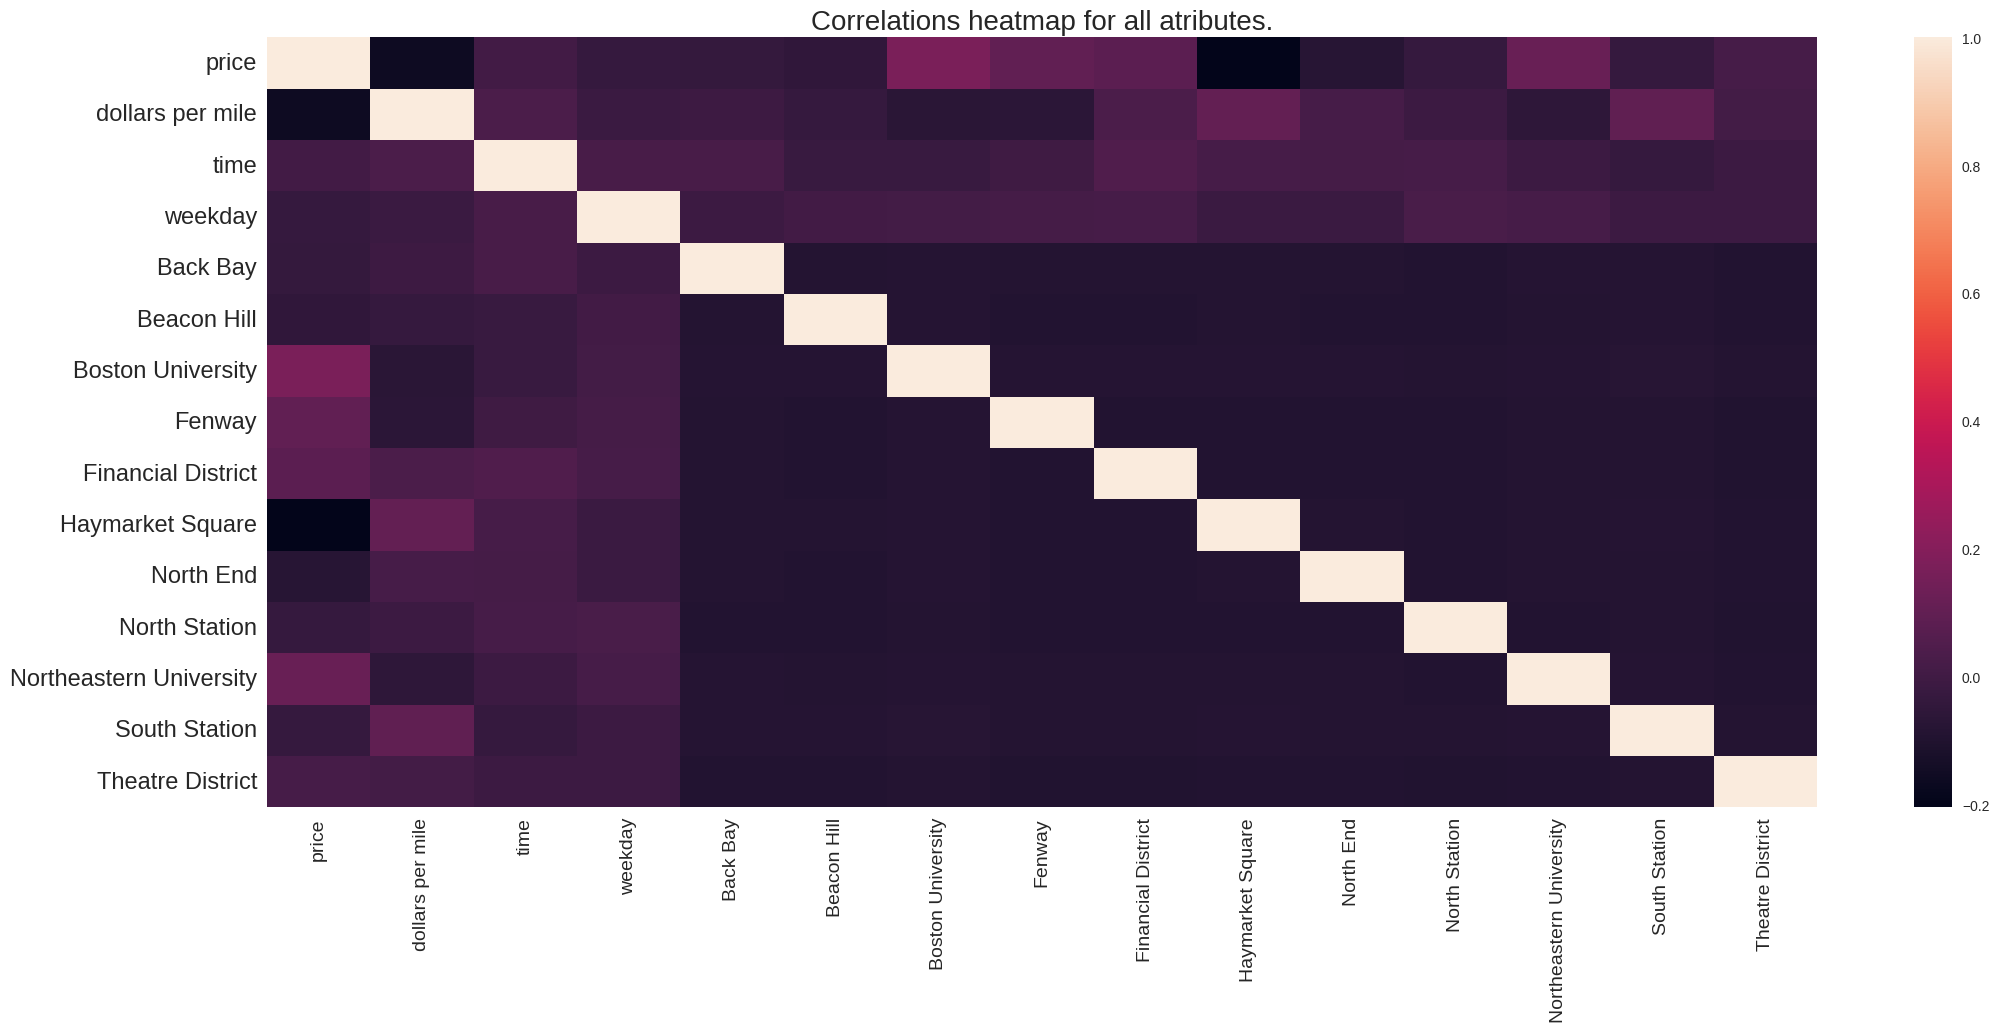

In [42]:
# Creating an object with the dummy variables for each source location
dummies = pd.get_dummies(rides['source'])
# Concatenating the rides dataframe object and the dummy object into a new one to be used for the OLS analysis only
rides_ols = pd.concat([rides,dummies], axis=1)
# Dropping one dummy column to avoid the dummy variable trap 
rides_ols.drop(['West End'], inplace=True, axis=1)

# Columns of interest in the regression and correlation analyis
filt1 = ['price','dollars per mile','time','weekday','Back Bay', 'Beacon Hill',
       'Boston University', 'Fenway', 'Financial District', 'Haymarket Square',
       'North End', 'North Station', 'Northeastern University',
       'South Station', 'Theatre District']
rides_ols_corr = rides_ols[filt1].corr()

# Plotting the correlations heatmap
plt.figure(figsize=((25,10)))
ax = sns.heatmap(rides_ols_corr)
plt.yticks(fontsize=17)
plt.xticks(fontsize=14)
plt.title('Correlations heatmap for all atributes.',fontsize=20)

plt.show()

In [43]:
from statsmodels.formula.api import ols

# Creating a filter to select the independent variables to take to OLS
filt = ['time','weekday','Back Bay', 'Beacon Hill',
       'Boston University', 'Fenway', 'Financial District', 'Haymarket Square',
       'North End', 'North Station', 'Northeastern University',
       'South Station', 'Theatre District']

# Defining the independent and the dependent variables
d = rides_ols['dollars per mile']
i = rides_ols[filt]

# Creasting and visualizing the model
profit_model = ols(formula="d~i",data=rides_ols).fit()
print(profit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      d   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     6.611
Date:                Thu, 25 May 2023   Prob (F-statistic):           1.44e-12
Time:                        18:27:37   Log-Likelihood:                -8711.8
No. Observations:                2509   AIC:                         1.745e+04
Df Residuals:                    2495   BIC:                         1.753e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2308      0.619      8.449      0.0

In [44]:
# Creating a filter to select the independent variables to take to OLS
filt = ['Back Bay','Beacon Hill','Boston University','Fenway','Financial District','Haymarket Square','North End','North Station','Northeastern University','South Station','Theatre District']

# Defining the independent and the dependent variables
d = rides_ols['dollars per mile']
i = rides_ols[filt]

# Creasting and visualizing the model
profit__location_model = ols(formula="d~i",data=rides_ols).fit()
print(profit__location_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      d   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     7.564
Date:                Thu, 25 May 2023   Prob (F-statistic):           6.06e-13
Time:                        18:27:49   Log-Likelihood:                -8713.2
No. Observations:                2509   AIC:                         1.745e+04
Df Residuals:                    2497   BIC:                         1.752e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4688      0.526     10.401      0.0

## Regressive model to predict ride profitability

In [45]:
# Creating a filter to select the independent variables to take to OLS
filt = ['time','weekday']

# Defining the independent and the dependent variables
d = rides_ols['dollars per mile']
i = rides_ols[filt]

# Creasting and visualizing the model
profit_time_model = ols(formula="d~i",data=rides_ols).fit()
print(profit_time_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      d   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.837
Date:                Thu, 25 May 2023   Prob (F-statistic):              0.160
Time:                        18:28:02   Log-Likelihood:                -8752.5
No. Observations:                2509   AIC:                         1.751e+04
Df Residuals:                    2506   BIC:                         1.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4879      0.372     14.735      0.0

<ipython-input-49-340d4029b6e2>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,1)


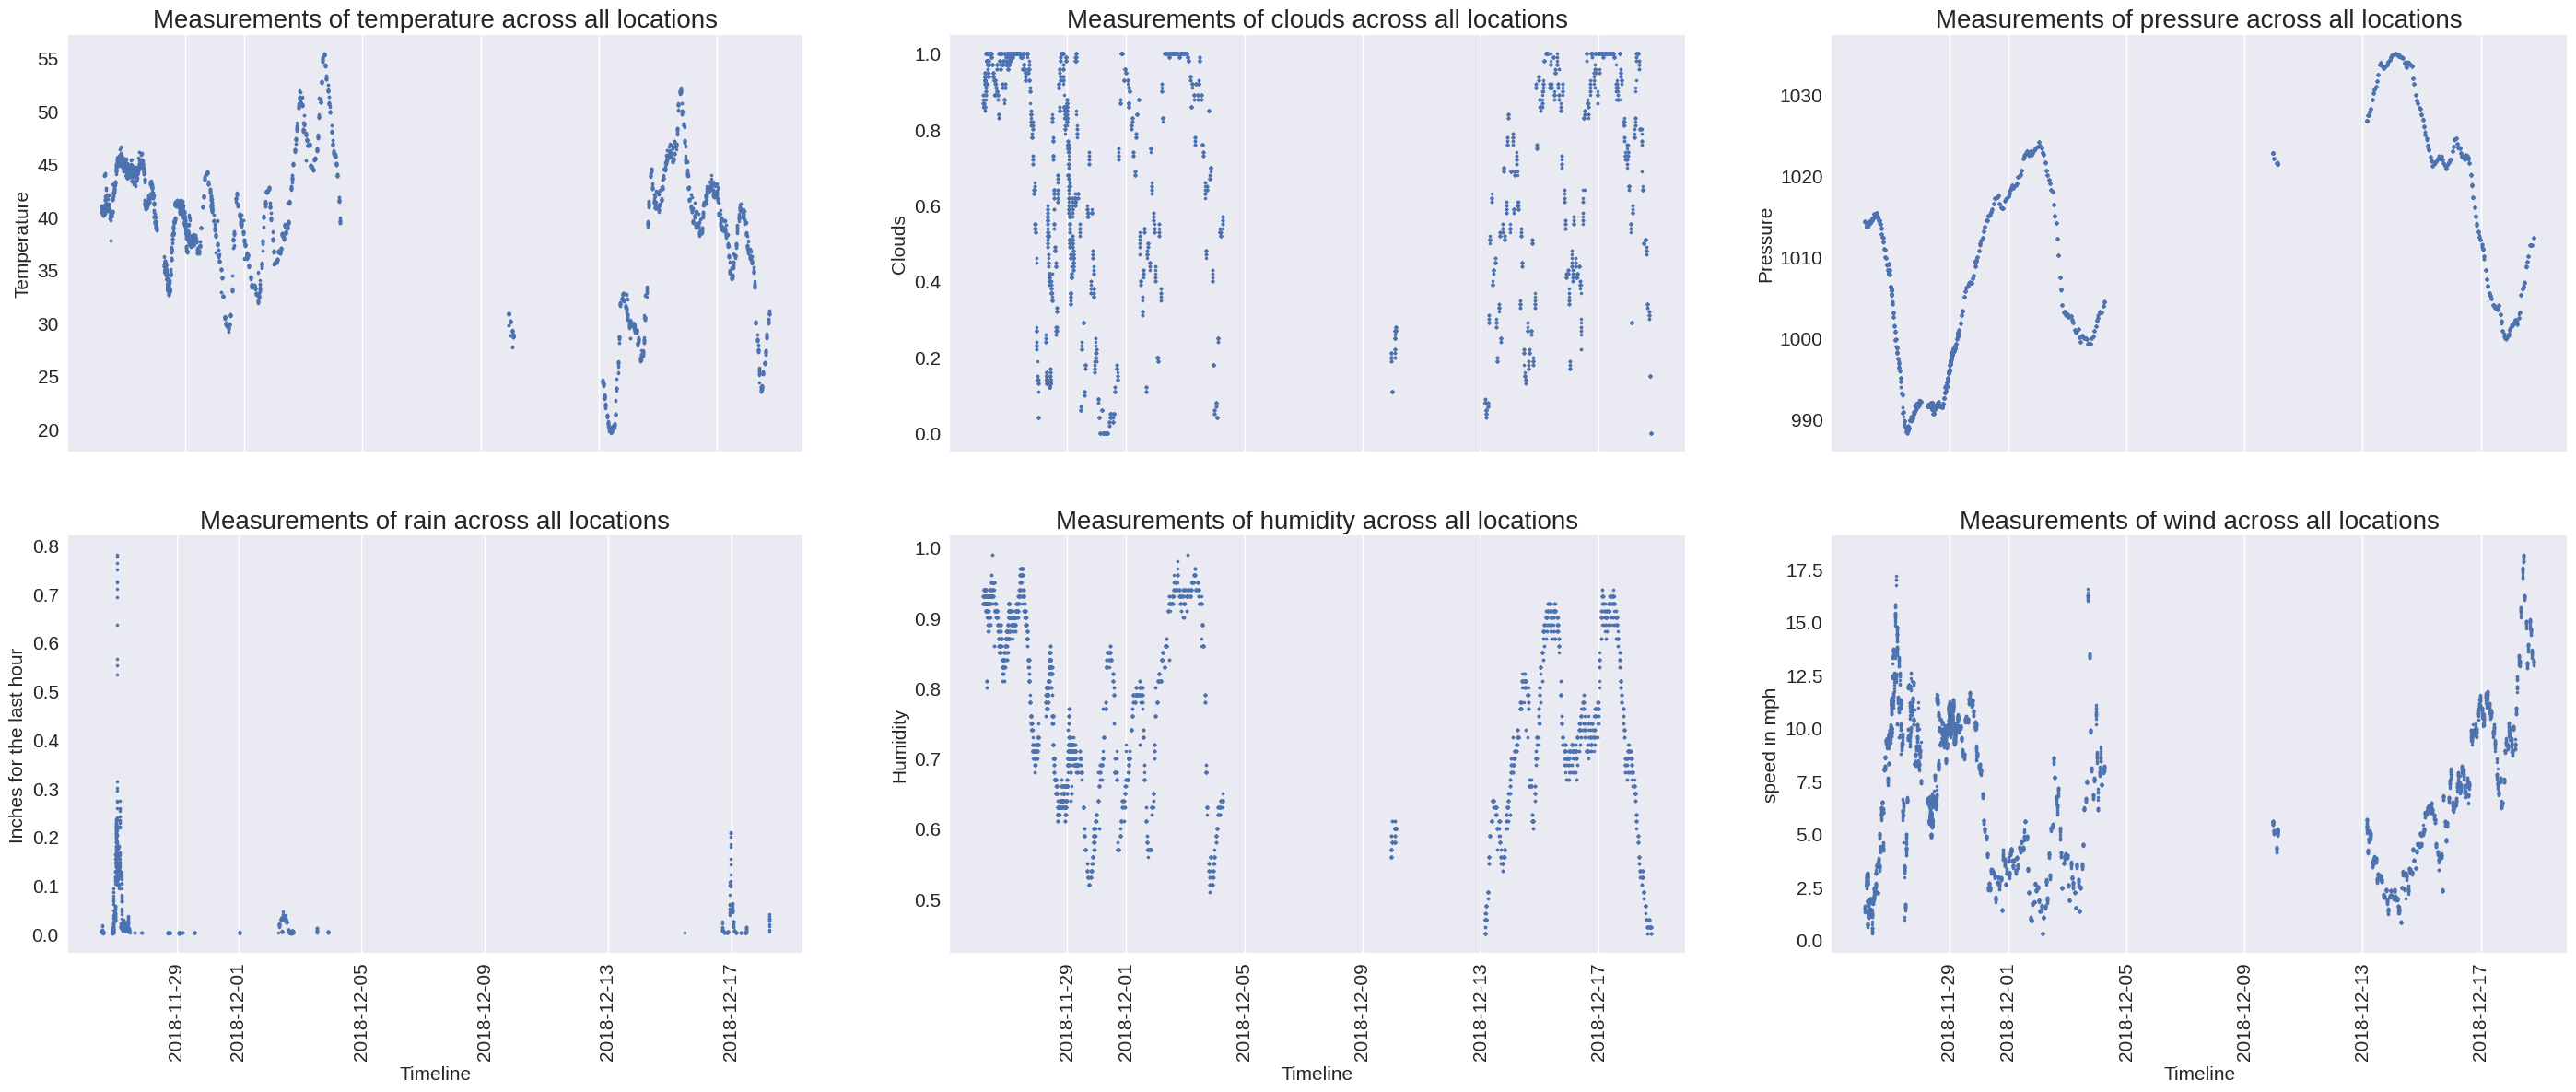

In [49]:
# Changing the name of the dataframe object, since there is no need to clean the data so far

weather.set_index(weather['time_stamp'],drop=False)

# Plotting the data on a scatterplot to take a high-level look at how it spreads through the timeline
plt.figure(figsize=((35,20)))
plt.grid(axis='y')

plt.subplot(3,3,1)
plt.scatter(weather['time_stamp'],weather['temp'],s=5)
plt.xticks(color='white')
plt.yticks(fontsize=15)
plt.xlabel('')
plt.ylabel('Temperature',fontsize=15)
plt.title('Measurements of temperature across all locations',fontsize=20)
plt.grid(axis='y')

plt.subplot(3,3,2)
plt.scatter(weather['time_stamp'],weather['clouds'],s=5)
plt.xticks(color='white')
plt.yticks(fontsize=15)
plt.xlabel('')
plt.ylabel('Clouds',fontsize=15)
plt.title('Measurements of clouds across all locations',fontsize=20)
plt.grid(axis='y')
plt.subplot(3,3,3)
plt.scatter(weather['time_stamp'],weather['pressure'],s=5)
plt.xticks(color='white')
plt.yticks(fontsize=15)
plt.xlabel('')
plt.ylabel('Pressure',fontsize=15)
plt.title('Measurements of pressure across all locations',fontsize=20)
plt.grid(axis='y')

plt.subplot(3,3,4)
plt.scatter(weather['time_stamp'],weather['rain'],s=5)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Timeline',fontsize=15)
plt.ylabel('Inches for the last hour',fontsize=15)
plt.title('Measurements of rain across all locations',fontsize=20)
plt.grid(axis='y')

plt.subplot(3,3,5)
plt.scatter(weather['time_stamp'],weather['humidity'],s=5)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Timeline',fontsize=15)
plt.ylabel('Humidity',fontsize=15)
plt.title('Measurements of humidity across all locations',fontsize=20)
plt.grid(axis='y')

plt.subplot(3,3,6)
plt.scatter(weather['time_stamp'],weather['wind'],s=5)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Timeline',fontsize=15)
plt.ylabel('speed in mph',fontsize=15)
plt.title('Measurements of wind across all locations',fontsize=20)
plt.grid(axis='y')

plt.show()

In [50]:
# Create a field with date, time and location for rides. 
# This is the field where weather and rides data will be merged on.
rides['date_loc'] = rides['source'].astype(str)+', '+rides['date'].astype(str)+', '+rides['time'].astype(str)

# Grouping weather information by location, date and time.
weather_merge = weather.groupby(['location','date','time']).mean()
weather_merge = pd.DataFrame(weather_merge).reset_index()
# Create a field with date, time and location for weather. 
weather_merge['date_loc'] = weather_merge['location'].astype(str)+', '+weather_merge['date'].astype(str)+', '+weather_merge['time'].astype(str)
weather_merge.index = weather_merge['date_loc']

# Merging the rides and the weather dataframes
merged = rides.join(weather_merge,on=['date_loc'],rsuffix='_wthr')
merged['rain'].fillna(0,inplace=True)

# Making sure that there is no ride without weather info, and vice-versa
merged = merged[pd.notnull(merged['price'])]
merged = merged[pd.notnull(merged['date_loc_wthr'])]

# Resetting the index
merged.reset_index(inplace=True,drop=True)

<ipython-input-50-3d43fbf66c7d>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weather_merge = weather.groupby(['location','date','time']).mean()


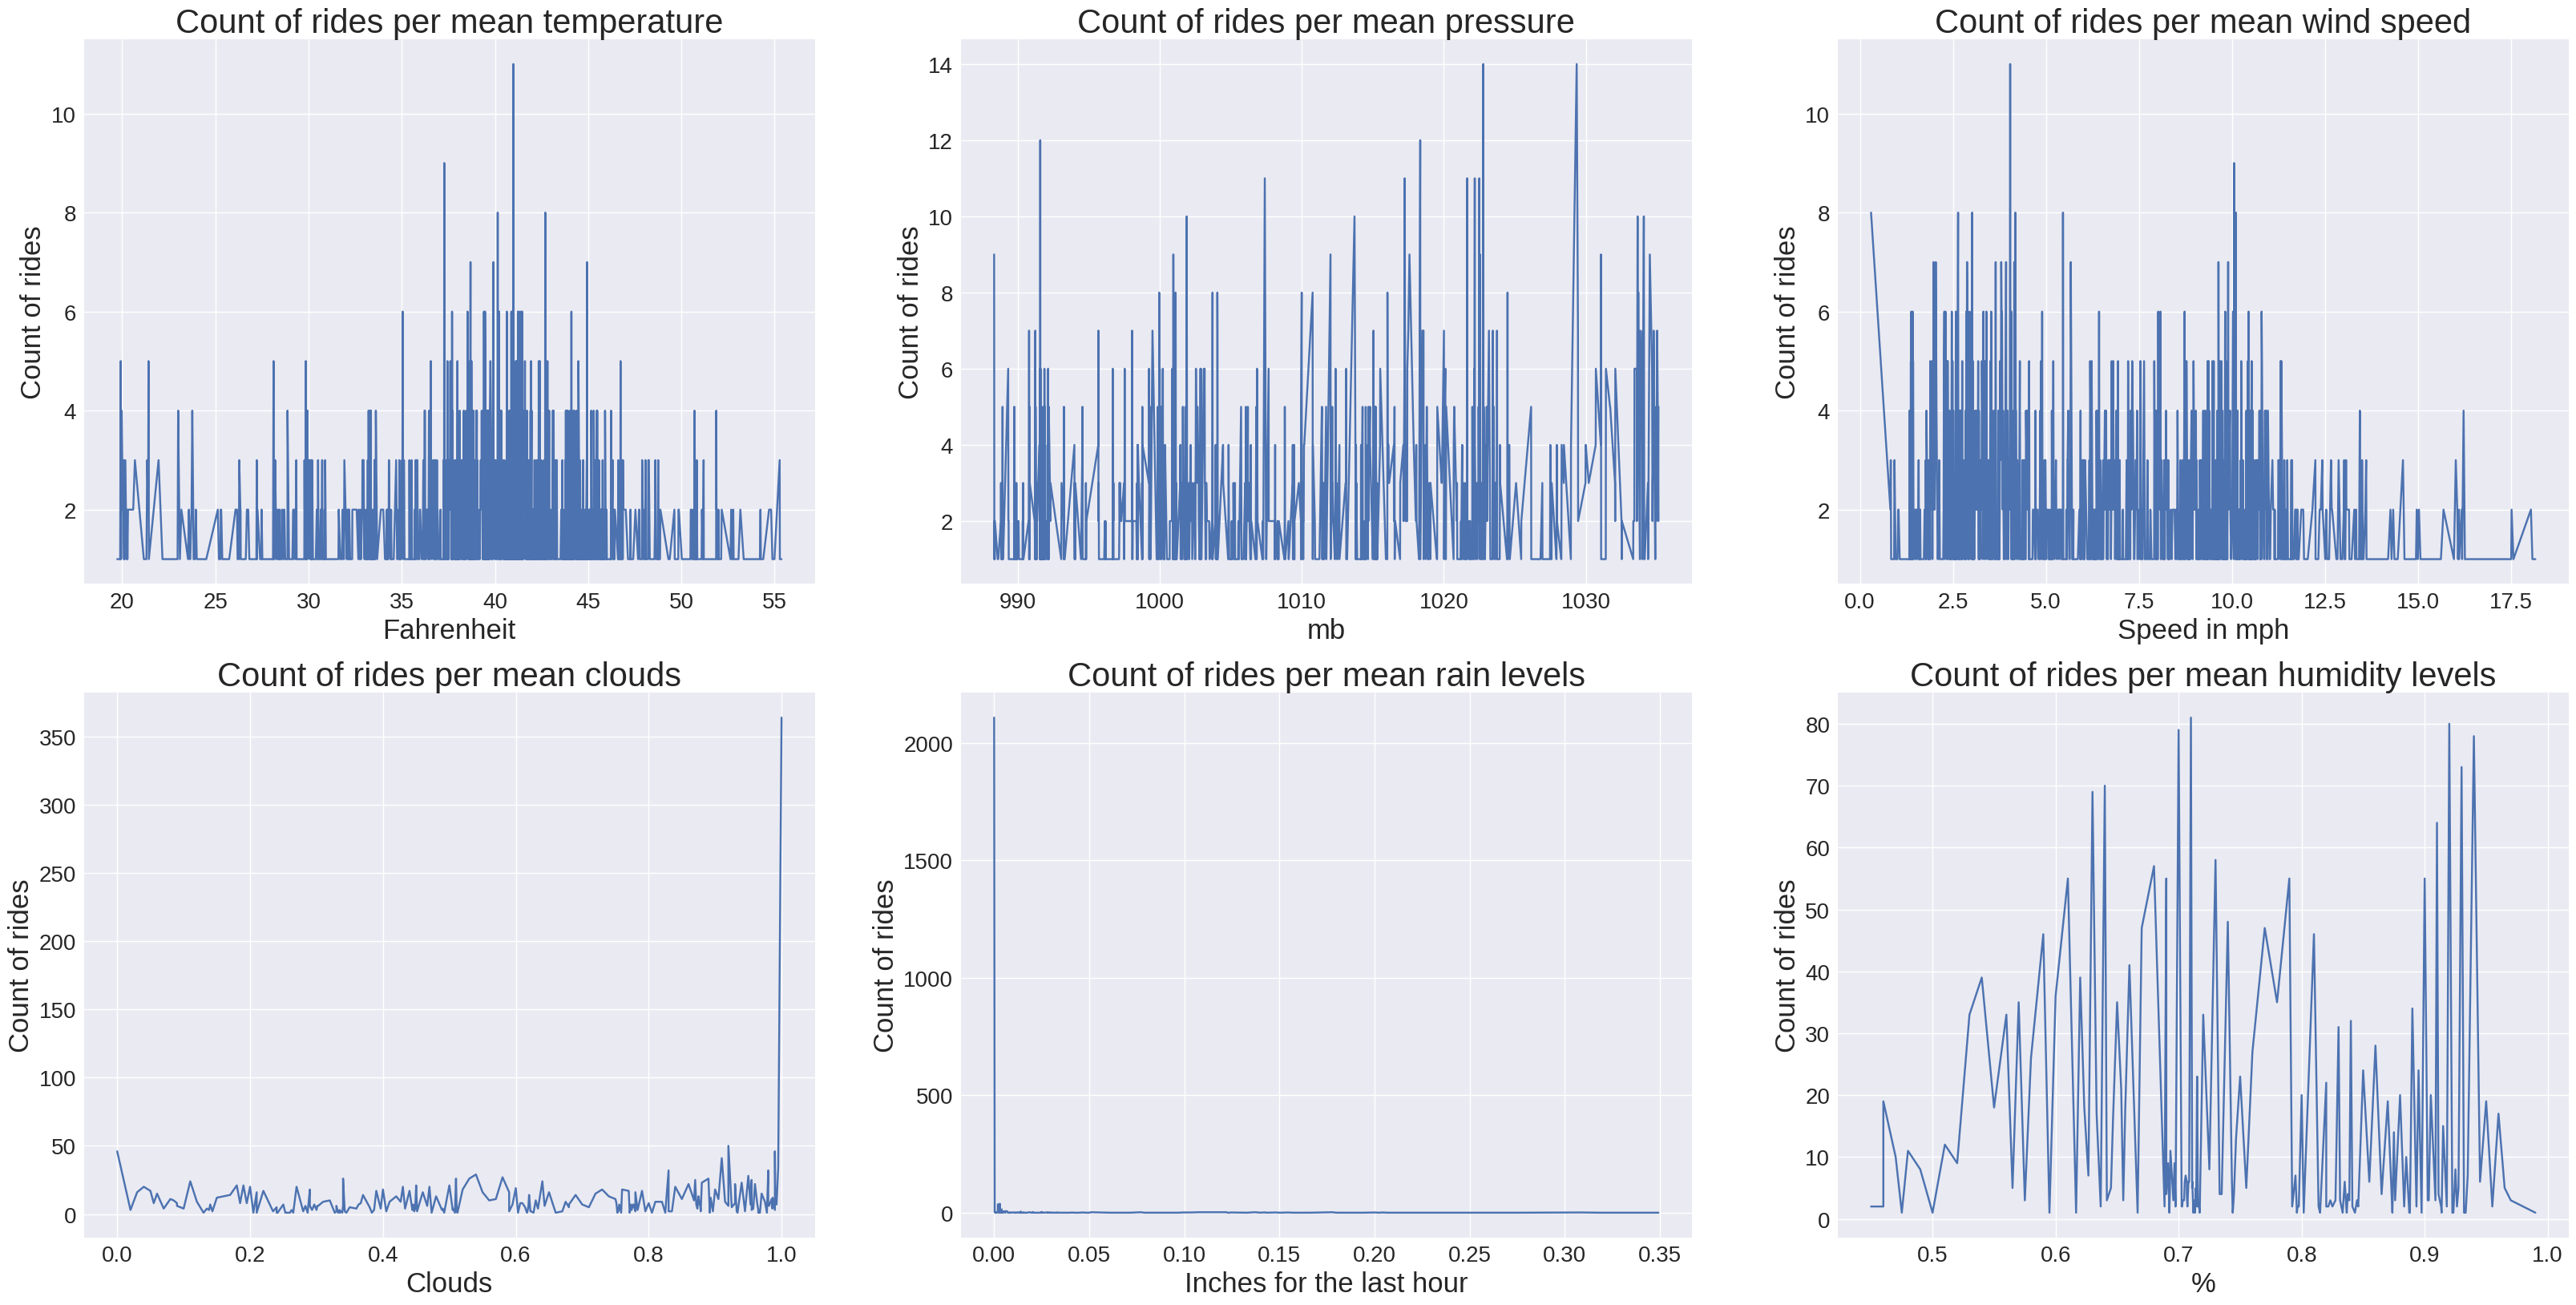

In [52]:
# Setting figure size
plt.figure(figsize=((40,30)))

# Plotting average daily temperature
plt.subplot(3,3,1)
merged.groupby('temp')['id'].count().plot()
plt.title('Count of rides per mean temperature',fontsize=30)
plt.xlabel('Fahrenheit',fontsize=25)
plt.ylabel('Count of rides',fontsize=25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Plotting average daily pressure
plt.subplot(3,3,2)
merged.groupby('pressure')['id'].count().plot()
plt.title('Count of rides per mean pressure',fontsize=30)
plt.xlabel('mb',fontsize=25)
plt.ylabel('Count of rides',fontsize=25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Plotting average daily wind speed
plt.subplot(3,3,3)
merged.groupby('wind')['id'].count().plot()
plt.title('Count of rides per mean wind speed',fontsize=30)
plt.xlabel('Speed in mph',fontsize=25)
plt.ylabel('Count of rides',fontsize=25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Plotting average daily clouds
plt.subplot(3,3,4)
merged.groupby('clouds')['id'].count().plot()
plt.title('Count of rides per mean clouds',fontsize=30)
plt.xlabel('Clouds',fontsize=25)
plt.ylabel('Count of rides',fontsize=25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Plotting average daily rain
plt.subplot(3,3,5)
merged.groupby('rain')['id'].count().plot()
plt.title('Count of rides per mean rain levels',fontsize=30)
plt.xlabel('Inches for the last hour',fontsize=25)
plt.ylabel('Count of rides',fontsize=25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Plotting average daily humidity
plt.subplot(3,3,6)
merged.groupby('humidity')['id'].count().plot()
plt.title('Count of rides per mean humidity levels',fontsize=30)
plt.xlabel('%',fontsize=25)
plt.ylabel('Count of rides',fontsize=25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.show()

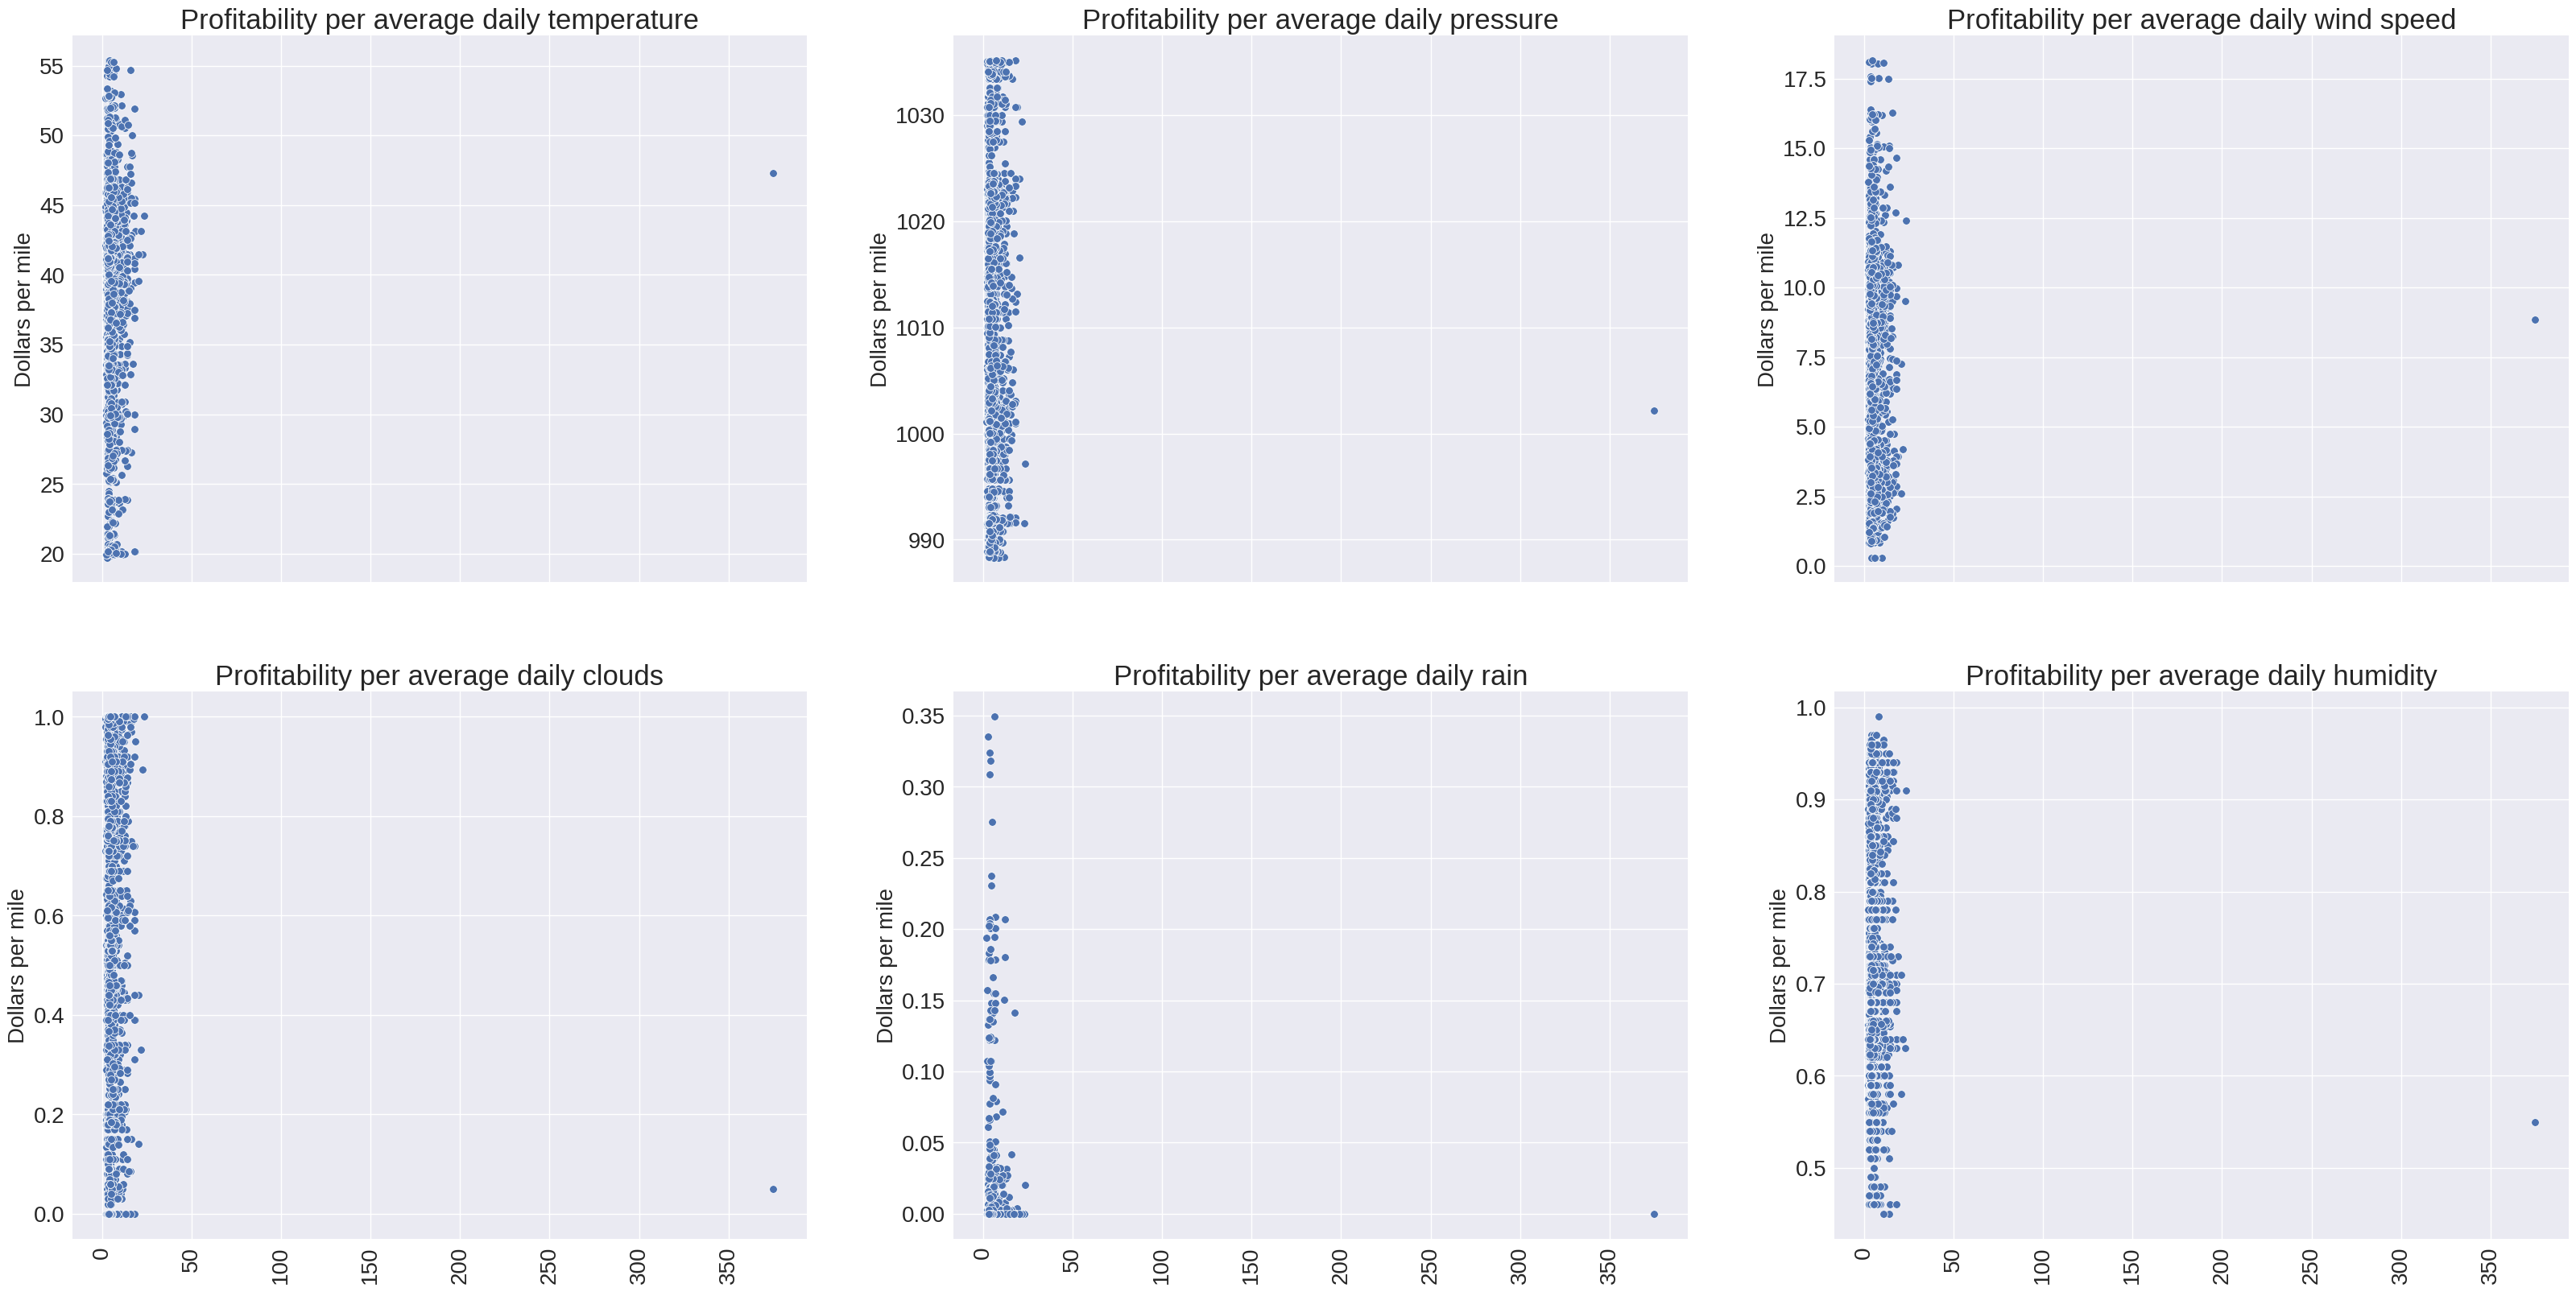

In [54]:
# Setting figure size
plt.figure(figsize=((40,30)))

# Plotting average daily temperature
plt.subplot(3,3,1)
sns.scatterplot(x='dollars per mile',y='temp',data=merged)
plt.title('Profitability per average daily temperature',fontsize=25)
plt.ylabel('Dollars per mile',fontsize=20)
plt.xlabel('')
plt.yticks(fontsize=20)
plt.xticks(color='white')

# Plotting average daily pressure
plt.subplot(3,3,2)
sns.scatterplot(x='dollars per mile',y='pressure',data=merged)
plt.title('Profitability per average daily pressure',fontsize=25)
plt.ylabel('Dollars per mile',fontsize=20)
plt.xlabel('')
plt.yticks(fontsize=20)
plt.xticks(color='white')

# Plotting average daily wind speed
plt.subplot(3,3,3)
sns.scatterplot(x='dollars per mile',y='wind',data=merged)
plt.title('Profitability per average daily wind speed',fontsize=25)
plt.ylabel('Dollars per mile',fontsize=20)
plt.xlabel('')
plt.yticks(fontsize=20)
plt.xticks(color='white')

# Plotting average daily clouds
plt.subplot(3,3,4)
sns.scatterplot(x='dollars per mile',y='clouds',data=merged)
plt.title('Profitability per average daily clouds',fontsize=25)
plt.ylabel('Dollars per mile',fontsize=20)
plt.xlabel('')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20,rotation=90)

# Plotting average daily rain
plt.subplot(3,3,5)
sns.scatterplot(x='dollars per mile',y='rain',data=merged)
plt.title('Profitability per average daily rain',fontsize=25)
plt.ylabel('Dollars per mile',fontsize=20)
plt.xlabel('')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20,rotation=90)

# Plotting average daily humidity
plt.subplot(3,3,6)
sns.scatterplot(x='dollars per mile',y='humidity',data=merged)
plt.title('Profitability per average daily humidity',fontsize=25)
plt.ylabel('Dollars per mile',fontsize=20)
plt.xlabel('')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20,rotation=90)

plt.show()

<ipython-input-56-71dec7a019f6>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_corr = merged[filt4].corr()


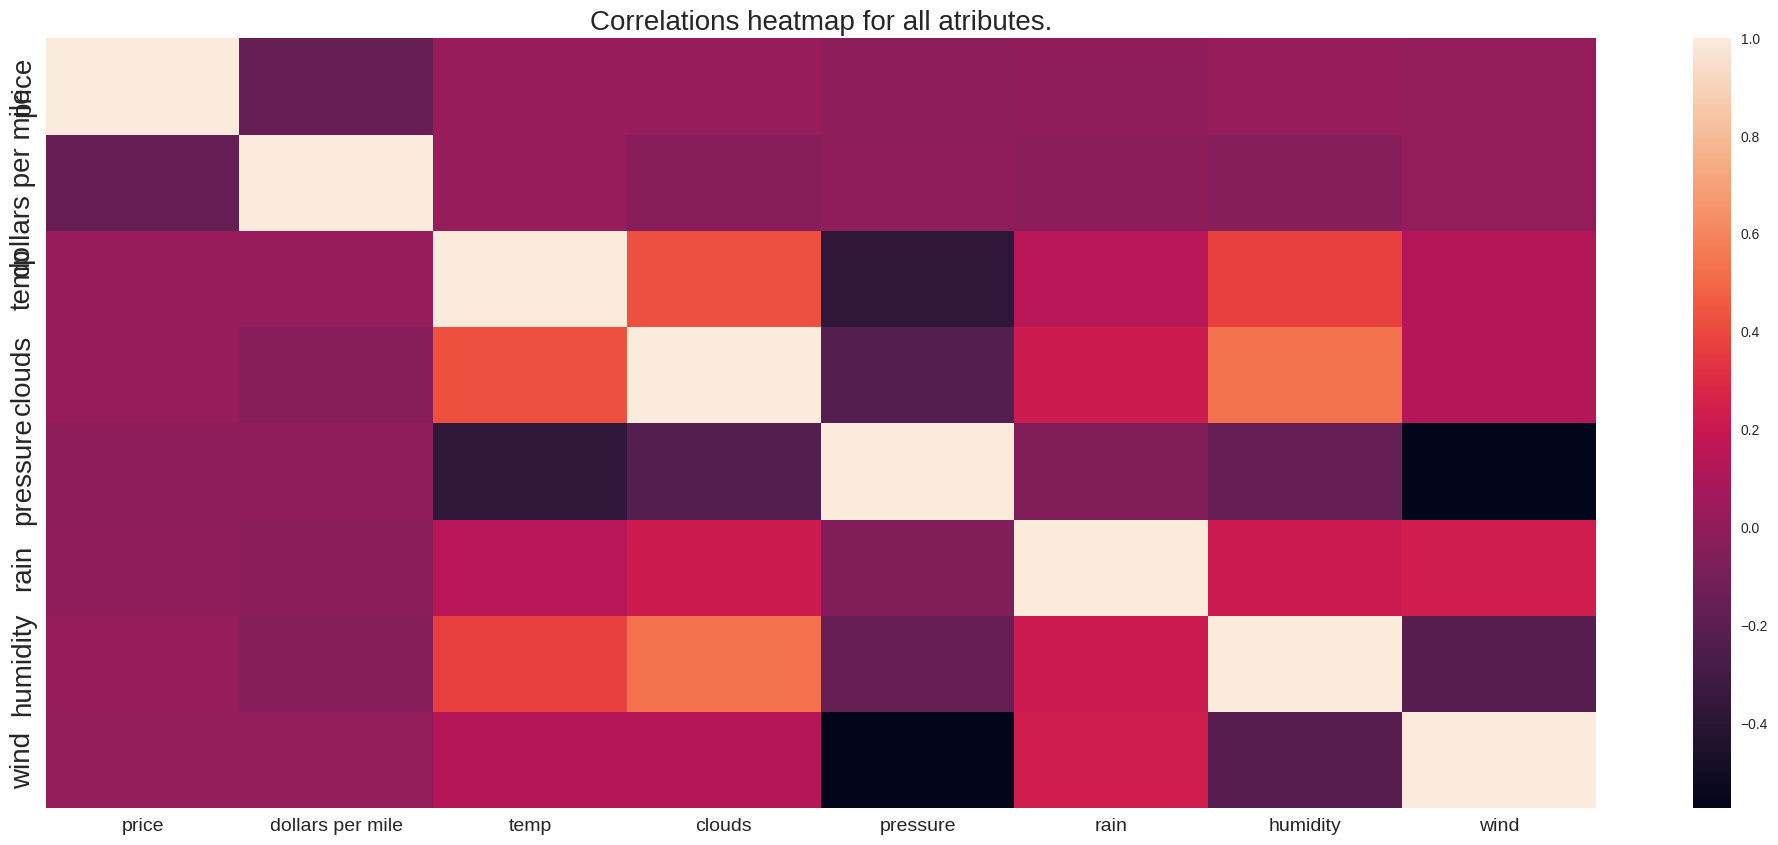

In [56]:
# Before running the regression analysis, it's useful to look at correlations first 
# to identify potential predictors.

# Columns of interest in the regression and correlation analyis
filt4 = ['price','dollars per mile','location','temp','clouds','pressure','rain','humidity','wind']
merged_corr = merged[filt4].corr()

# Plotting the correlations heatmap
plt.figure(figsize=((25,10)))
ax = sns.heatmap(merged_corr)
plt.yticks(fontsize=20)
plt.xticks(fontsize=14)
plt.title('Correlations heatmap for all atributes.',fontsize=20)

plt.show()

In [57]:
# Creating a filter to select the independent variables to take to OLS
filt5 = ['temp','clouds','pressure','rain','humidity','wind']

# Defining the independent and the dependent variables. The filter column is the same as above
d = merged['dollars per mile']
i = merged[filt5]

# Creasting and visualizing the model
weather_profit_model = ols(formula="d~i",data=merged).fit()
print(weather_profit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      d   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.792
Date:                Thu, 25 May 2023   Prob (F-statistic):             0.0969
Time:                        18:37:37   Log-Likelihood:                -8701.7
No. Observations:                2494   AIC:                         1.742e+04
Df Residuals:                    2487   BIC:                         1.746e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.4325     17.622      0.479      0.6

In [58]:
# Defining the independent and the dependent variables
d = merged['price']
i = merged[filt5]

# Creasting and visualizing the model
weather_price_model = ols(formula="d~i",data=merged).fit()
print(weather_price_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      d   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4139
Date:                Thu, 25 May 2023   Prob (F-statistic):              0.870
Time:                        18:37:52   Log-Likelihood:                -5653.3
No. Observations:                2494   AIC:                         1.132e+04
Df Residuals:                    2487   BIC:                         1.136e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1948      5.190      1.579      0.1